원본 커널 : https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

### 간단 설명
- to develop a machine learning model that can **predict the poverty level of households** using both individual and household characteristics. 
- The training set has one additional column , `Target`, which represents the poverty level on a 1-4 scale and is the label for the competition.

<br>

### Target Label
- The `Target` vlaues represent poverty levels as follows:
    - 1 = extreme poverty
    - 2 = moderate poverty
    - 3 = vulerable households
    - 4 = non vulerable households
    
### 주요 feature 설명
- `id` : 개인 pk
- `idhogar` : household pk
- `parentesco1` : head of household 
- `Target` : the label


### Roadmap
- 문제 이해하기
- EDA
- Feature engineering
- 여러 baseline 머신러닝 모델 비교하기
- 복잡한 머신러닝 모델 구현
- 선택한 모델 최적화하기
- 예측하기
- 결론


In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [154]:
path = 'C:/Users/user/Desktop/kaggle_data/04. costa-rican-household-poverty-prediction/'

In [155]:
pd.options.display.max_columns = 150

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


- 데이터 타입이 numeric인 변수가 130개
    - boolean 변수 이거나 서열 변수

In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


<br>

### Integer columns

In [158]:
train.select_dtypes(np.int64).nunique()[:10]

hacdor     2
rooms     11
hacapo     2
v14a       2
refrig     2
v18q       2
r4h1       6
r4h2       9
r4h3       9
r4m1       6
dtype: int64

In [159]:
train.select_dtypes(np.int64).nunique().value_counts()

2     101
13      5
97      3
22      3
11      3
10      3
9       3
7       3
6       2
4       2
14      1
1       1
dtype: int64

Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

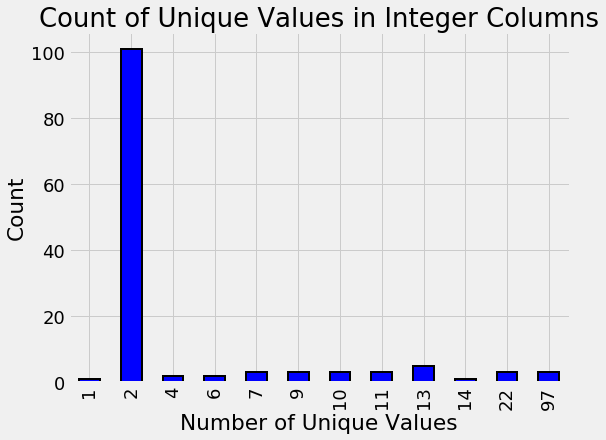

In [160]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue',
                                                                            figsize = (8,6),
                                                                            edgecolor = 'k',
                                                                            linewidth = 2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')
# 2개씩 갖고 있는 변수가 가장 많음

### 결과 해석 알아둘것

- `value_counts() == 2` 가 제일 많은 이유가 boolean 변수가 많기 때문

<br>

### Float Columns

- 가난의 수준을 색으로 나타내기 위해서 `OrderedDict` 사용

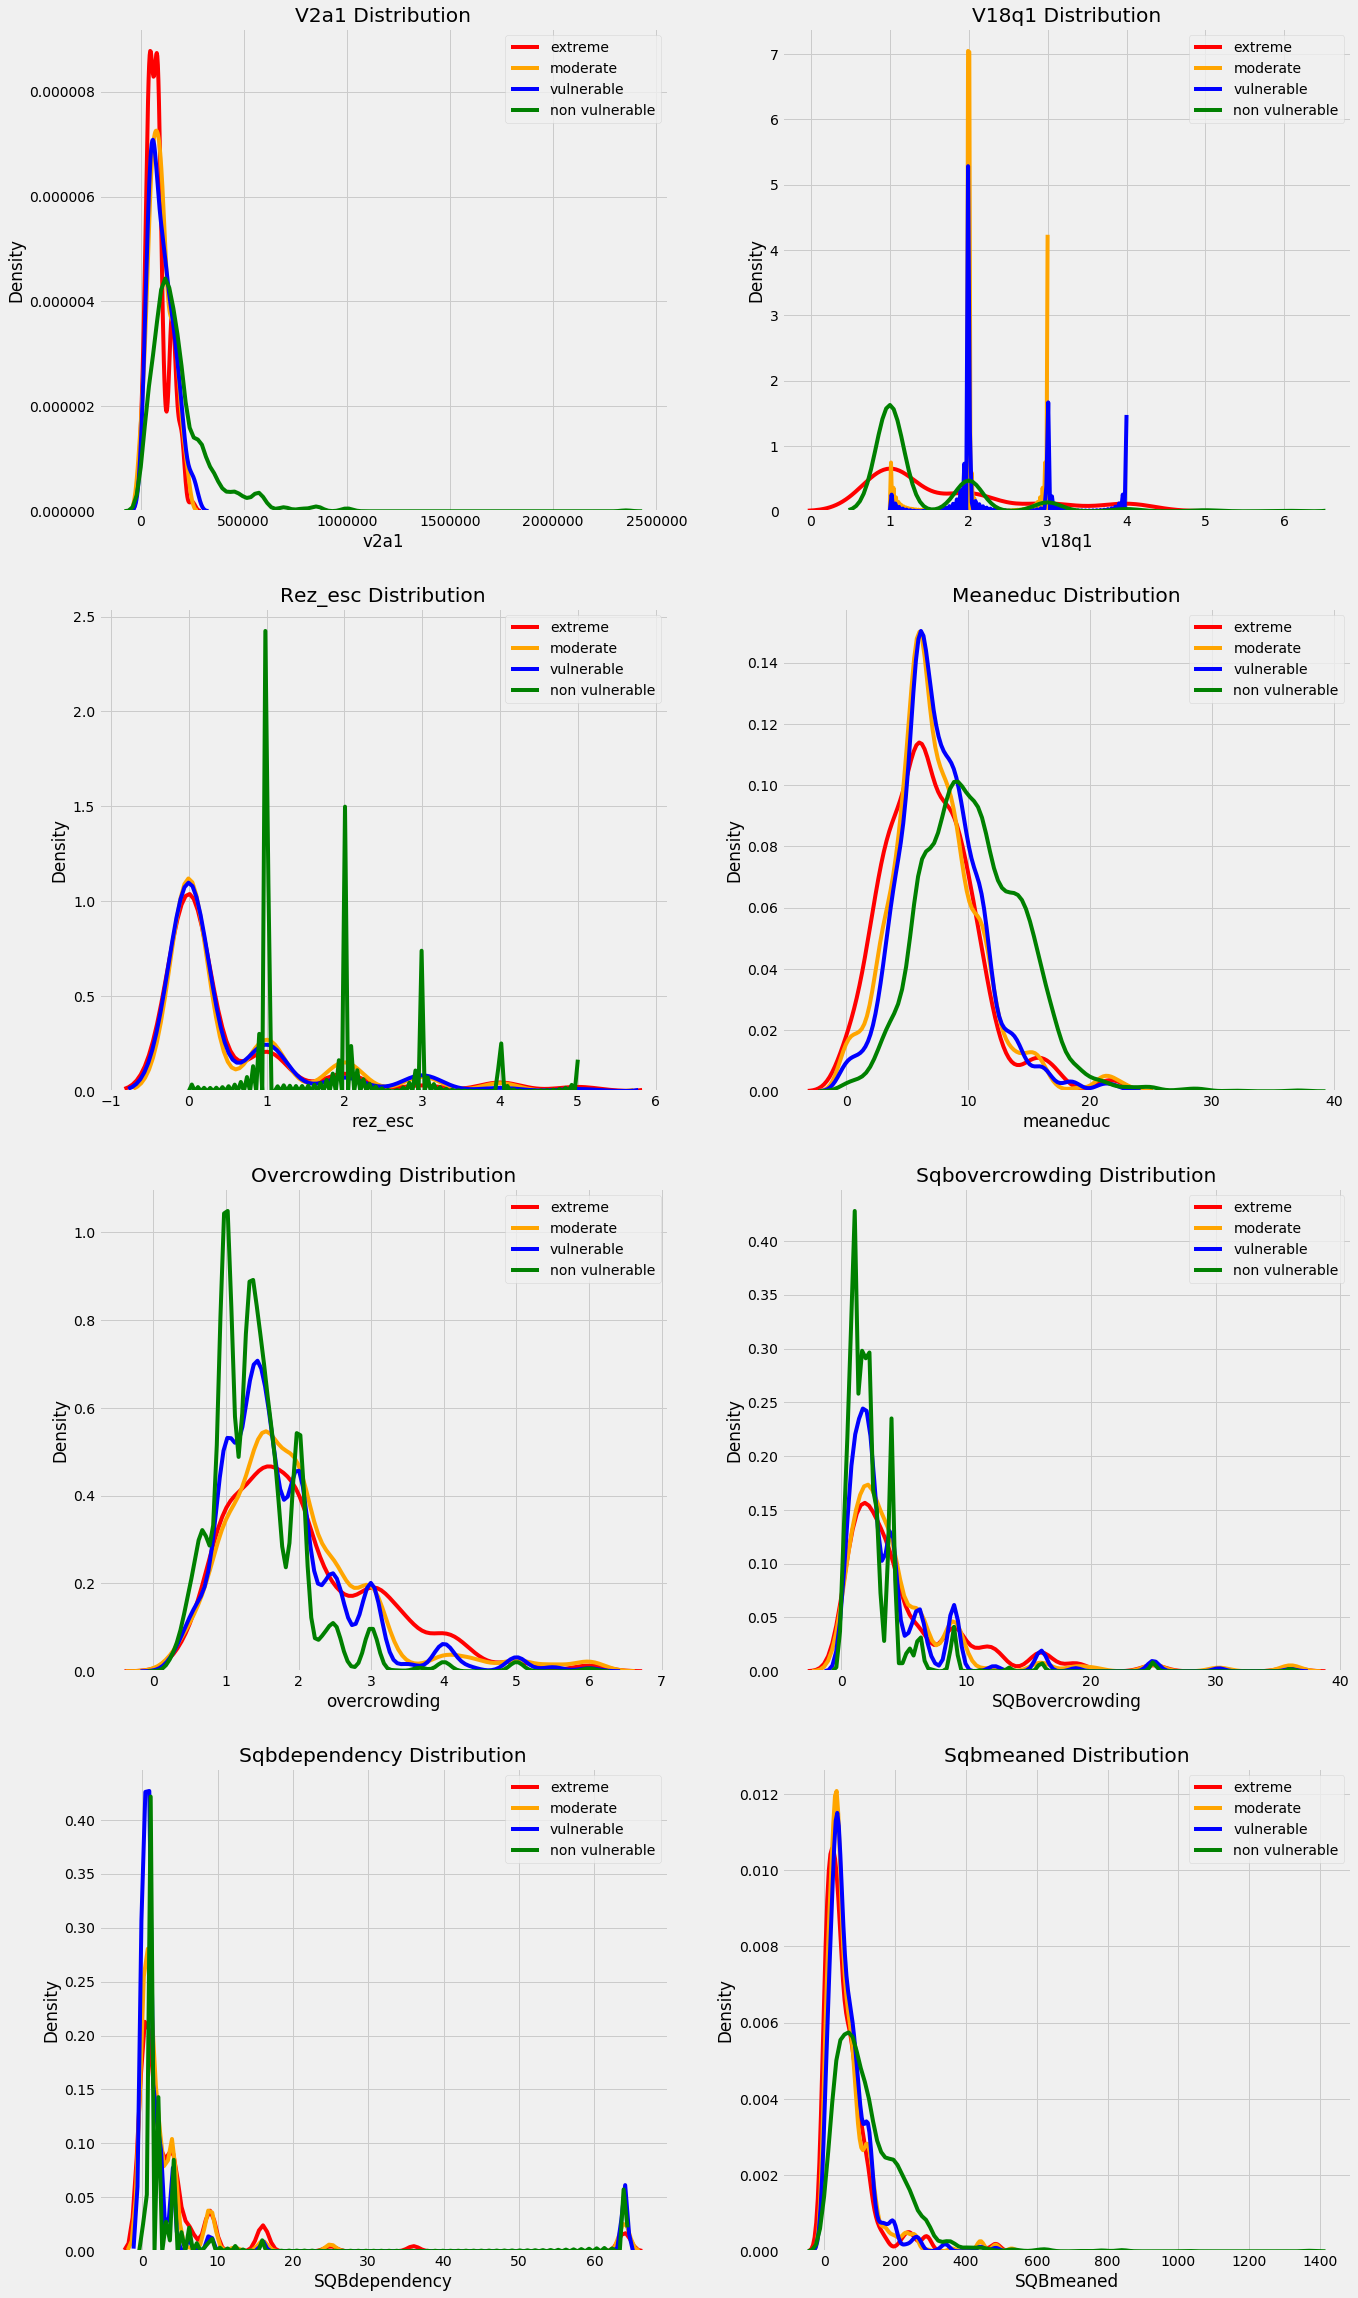

In [161]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# 색 mapping
colors = OrderedDict( {1: 'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

for i , col in enumerate(train.select_dtypes('float')):
    if i<=8:
        ax = plt.subplot(4,2, i+1)
    
        for poverty_level, color in colors.items():
            sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    # Target 별로 뽑아내서 밀도 함수 그리기
                        ax = ax, color = color, label = poverty_mapping[poverty_level])
        
            plt.title(f'{col.capitalize()} Distribution') # string format
            plt.xlabel(f'{col}')
            plt.ylabel('Density')
        
plt.subplots_adjust(top = 2)
        

In [162]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [163]:
colors

OrderedDict([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [164]:
colors.items()

odict_items([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [165]:
train.select_dtypes('float').columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

In [166]:
train.select_dtypes('float').head()

v2a1  v18q1  rez_esc  meaneduc  overcrowding  SQBovercrowding  \
0  190000.0    NaN      NaN      10.0      1.000000         1.000000   
1  135000.0    1.0      NaN      12.0      1.000000         1.000000   
2       NaN    NaN      NaN      11.0      0.500000         0.250000   
3  180000.0    1.0      1.0      11.0      1.333333         1.777778   
4  180000.0    1.0      NaN      11.0      1.333333         1.777778   

   SQBdependency  SQBmeaned  
0            0.0      100.0  
1           64.0      144.0  
2           64.0      121.0  
3            1.0      121.0  
4            1.0      121.0

<br>

### Object Columns

In [167]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

- `dependency` : dependency rate, (# 19 미만 + # 64 이상) / (# 19-64)
- `edjefe` : 남자 교육 기간
- `edjefa` : 여자 교육 기간

<br>

### 오류 나서 함수 새롭게 만들었음

In [168]:
def non(df, col):
    df.loc[df[col] == 'no', col] = np.float64(0)
    df.loc[df[col] == 'yes', col] = np.float64(1)
    
    df[col] = df[col].astype(np.float64)

In [169]:
non(train, 'dependency')
non(train, 'edjefa')
non(train, 'edjefe')
non(test, 'dependency')
non(test, 'edjefa')
non(test, 'edjefe')

In [170]:
train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

In [171]:
colors.items()

odict_items([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

In [172]:

poverty_mapping[1]

'extreme'

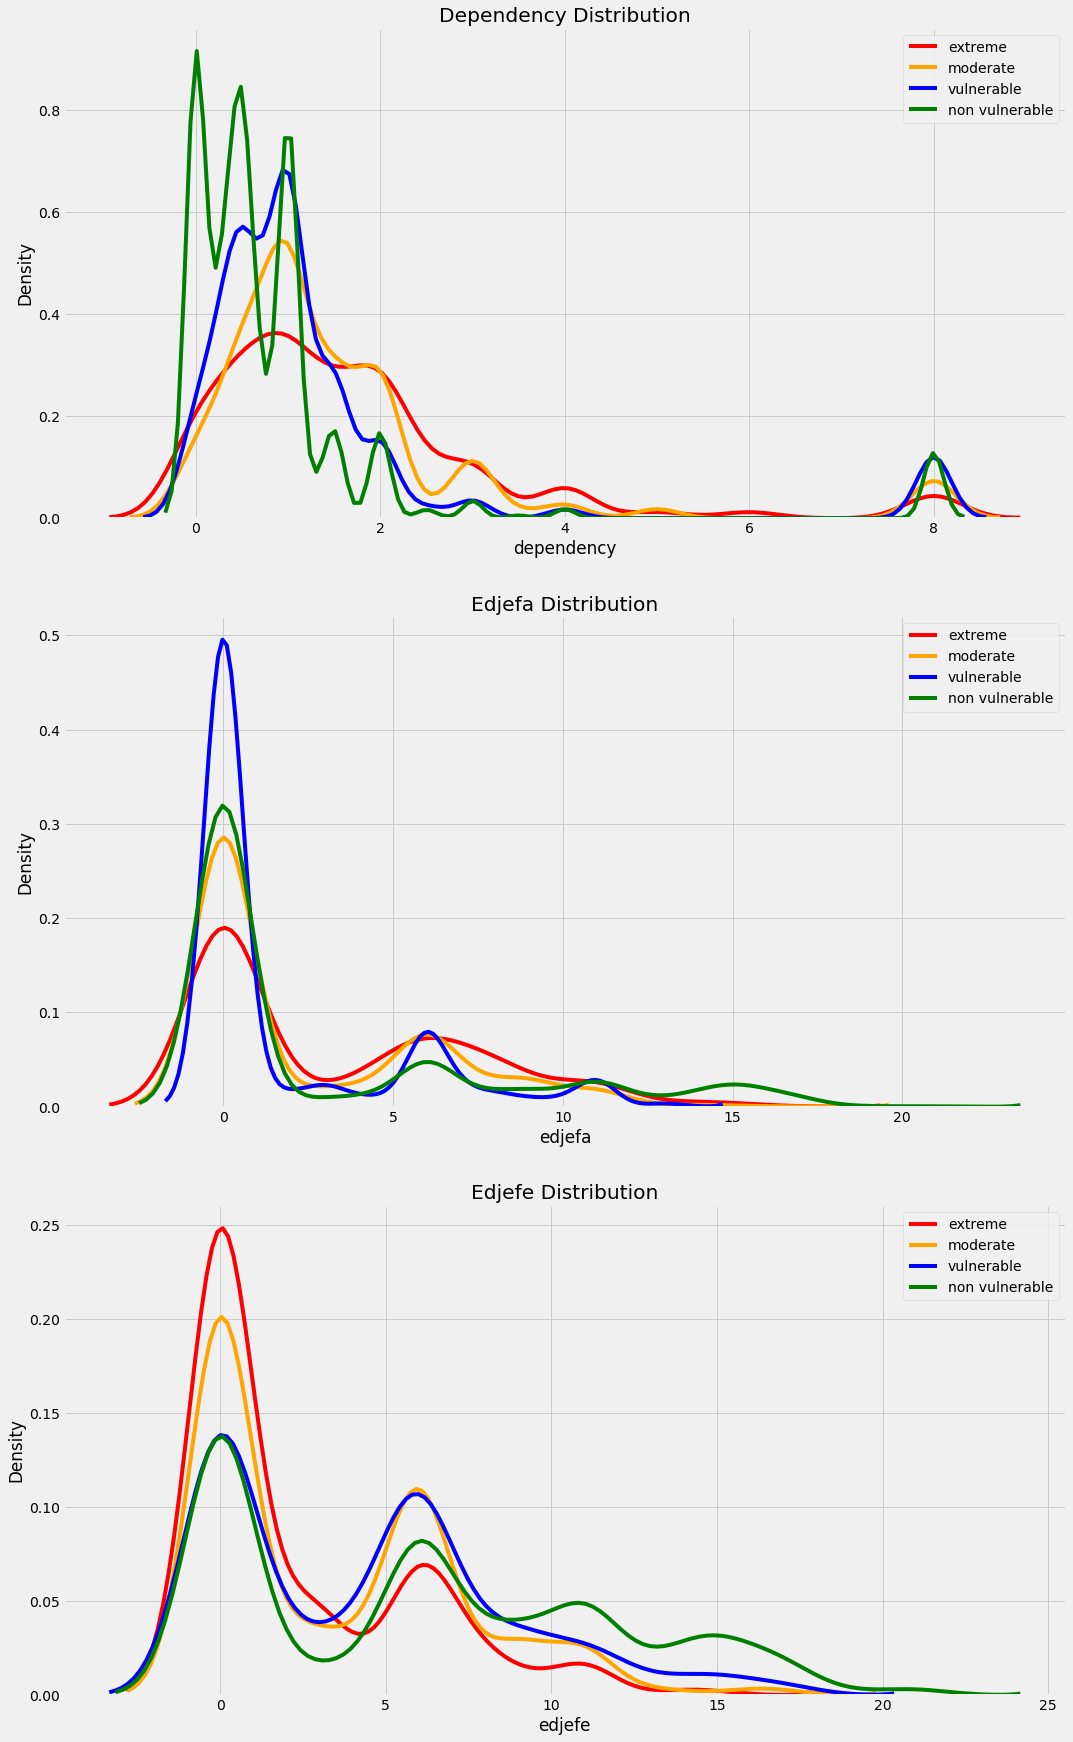

In [173]:
plt.figure(figsize = (16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution')
    
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    
plt.subplots_adjust(top = 2)

In [174]:
test['Target'] = np.nan
data =train.append(test, ignore_index = True)

<br>

### Exploring Label Distribution

- the head of household 인 사람들 (parentesco1 == 1) 을 subset 해서 가난에 대해 labeling 하기
- 각 가정마다 더 정확한 라벨링을 하기 위해서

Text(0.5, 1.0, 'Poverty Level Breakdown')

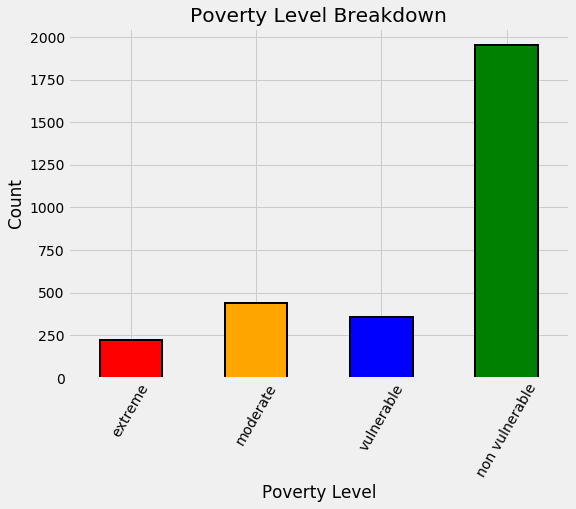

In [175]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6),
                     color = colors.values(),
                     edgecolor = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x - 1 for x in poverty_mapping.keys()], list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown')

- 불균형 클래스를 다루고 있음(weighted F1 대신에 macro F1 사용하는 이유)
    - oversampling 을 통해 해결

In [176]:
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

In [177]:
train_labels.head()

Target    idhogar
0     4.0  21eb7fcc1
1     4.0  0e5d7a658
2     4.0  2c7317ea8
5     4.0  2b58d945f
8     4.0  d6dae86b7

<br>

### 잘못된 라벨링 해결하기

- 똑같은 가정에 있는 개인들이 다른 가난 수준을 갖고 있음
- 가장의 가난 수준이 true label이라고 생각하고 문제 해결

#### 문제 해결
- household 별로 groupby 한 후, Target 의 수가 1이 아닌 경우는 잘못된 라벨링

In [178]:
(train.groupby('idhogar')['Target'].count() == 1).sum() # 이거랑은 왜 다른 결과값일까

398

In [179]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('동일하지 않은 경우: ', len(not_equal))

동일하지 않은 경우:  85


In [180]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

In [181]:
not_equal.index[0]

# 3명만 제대로된 라벨링이고 나머지는 X

'0172ab1d9'

<br>

### Families without Heads of Household

In [182]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()


# head 없는 가정 찾기
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('head 없는 가정 {}'.format(households_no_head['idhogar'].nunique()))

head 없는 가정 15


In [183]:
# Find households without a head and where labels are different

households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

print('가장 없는데 label 다른 경우는 {}'.format(sum(households_no_head_equal == False)))

가장 없는데 label 다른 경우는 0


<br>

### Correct Errors

- 가장 없는 가정과 다른 poverty levels 를 갖고 있는 member 수정하기

In [184]:
# not_equal : 다른 가난 수준 갖고 있음 
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('가족과 똑같은 Target 을 갖고 있지 않은 멤버 수 {}'.format(len(not_equal)))

가족과 똑같은 Target 을 갖고 있지 않은 멤버 수 0


<br>

### Missing Variables

In [185]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0 : 'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

<br>

#### Missing values - v18q1

- v18q1 : 태블릿 수
- v18q : 태블릿 보유 여부
    

In [186]:
def plot_value_counts(df, col, heads_only = False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                edgecolor = 'k',
                                                linewidth = 2)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Value Counts')
    plt.ylabel('Count')
    plt.show()

- heads = 가장 data

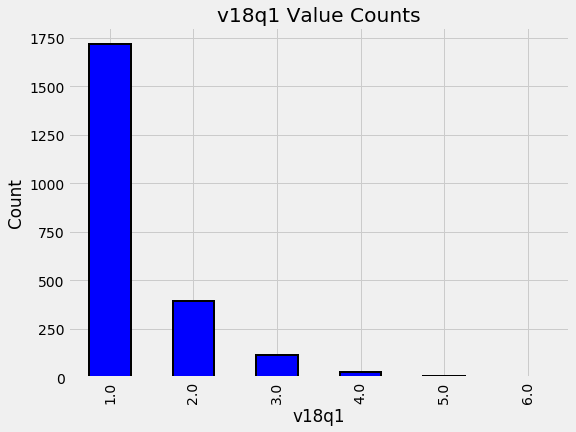

In [187]:
plot_value_counts(heads, 'v18q1')

In [188]:
pd.DataFrame(heads.groupby('v18q')['v18q1'].apply(lambda x : x.isnull().sum()))

v18q1
v18q       
0      8044
1         0

- 태블릿을 갖고 있지 않은 가장 중 nan 값은 없음

In [189]:
data['v18q1'] = data['v18q1'].fillna(0)

<br>

#### Missing values - v2a1

- `v2a1` : 월세
- `tipovivi_` : 집 보유 여부

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

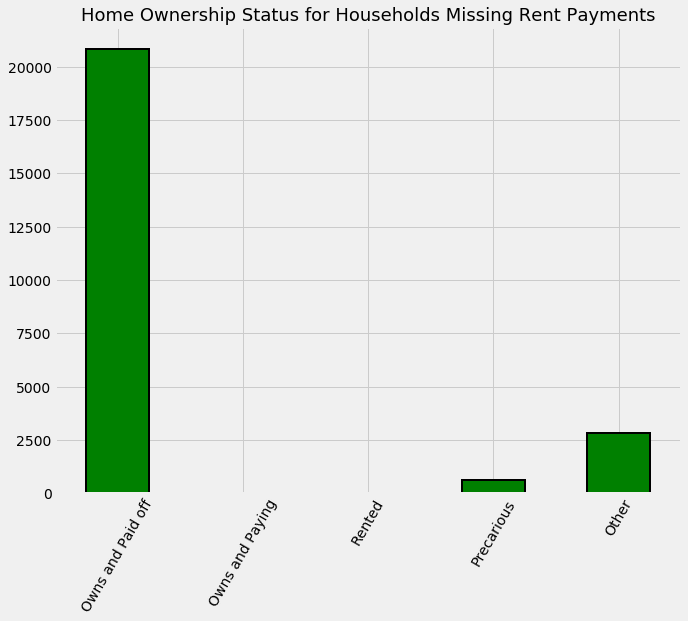

In [190]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                             color = 'green', edgecolor = 'k', linewidth = 2)

plt.xticks([0, 1, 2, 3, 4],
          ['Owns and Paid off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'], rotation = 60)

plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

In [191]:
data.filter(like = 'tipo').head()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
0          0          0          1          0          0
1          0          0          1          0          0
2          1          0          0          0          0
3          0          0          1          0          0
4          0          0          1          0          0

#### tipo 변수 설명

- tipovivi1, =1 own and fully paid house

- tipovivi2, "=1 own,  paying in installments"

- tipovivi3, =1 rented

- tipovivi4, =1 precarious

- tipovivi5, "=1 other(assigned,  borrowed)"


In [192]:
data.loc[data['tipovivi1'] == 1, 'v2a1'] = 0

data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

<br>

#### Missing values - rez_esc

- 졸업 후 기간


In [193]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

- 최대값은 17, 이것보다 나이 든 사람은 not in school
- `rez_esc` 는 7과 19 사이의 개인들을 정의한 변수이다.
- 이 범위 보다 어리거나 나이든 사람은 0으로 설정해야 한다.

In [194]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [195]:
data.loc[((data['age'] > 19) | (data['age']< 7)) & (data['rez_esc'].isnull()), 'rez_esc' ] = 0

data['rez_esc-missing'] = data['rez_esc'].isnull()

<br>

#### 이상치 해결

In [196]:
data.rez_esc.value_counts()

0.0     30894
1.0       728
2.0       336
3.0       174
4.0        80
5.0        39
99.0        1
Name: rez_esc, dtype: int64

In [197]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

<br>

### Plot Two categorical Variables

- 범주형 변수들 간의 상관관계를 보여주기 위해서, scatterplots, faceted bar plots, boxplot 사용

In [198]:
def plot_categoricals(x, y, data, annotate = True):
    
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x : 'raw_count'})
    
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    counts = counts.rename(columns = {x : 'normalized_count'}).reset_index()
    
    counts['percent'] = 100 * counts['normalized_count']
    
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
               s = 100 *np.sqrt(counts['raw_count']), marker = 'o', alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        for i , row in counts.iterrows():
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                              row[y] - (0.15 / counts[y].nunique())),
                        color = 'navy',
                        s = f"{round(row['percent'], 1)}%")
                
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
                         
                         
                         
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
                         
    msizes = list(range(sqr_min, sqr_max, int((sqr_max - sqr_min) / 5)))
                         
    markers = []
                         
    for size in msizes:
            markers.append(plt.scatter([], [], s = 100*size, label = f'{int(round(np.square(size) / 100) * 100)}' ,
                                      color = 'lightgreen', alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
                         
    plt.legend(handles = markers , title = 'Counts', labelspacing = 3, 
              handletextpad = 2, fontsize = 16, loc = (1.10, 0.19))
                         
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                xy = (0, 1), xycoords = 'figure points', size= 10)
                         
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()),
             counts[x].max() + ( 6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (6 / counts[y].nunique()),
             counts[y].max() + ( 6 / counts[y].nunique())))
                         
                         
    plt.grid(None)
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{y} vs {x}')
            

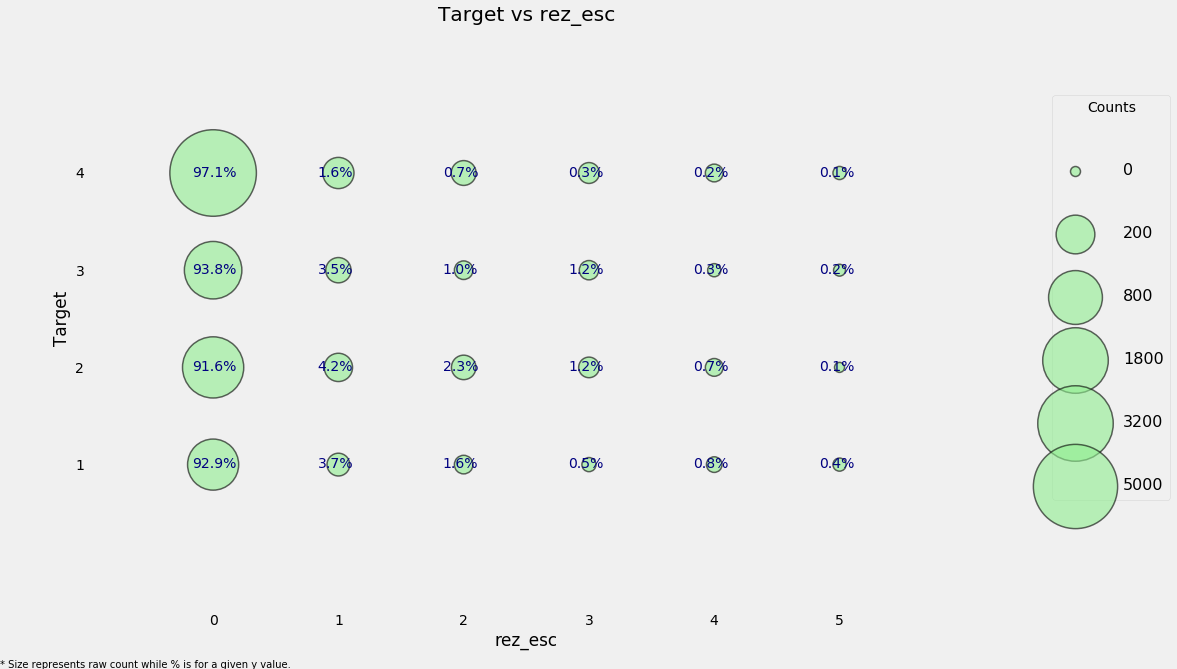

In [199]:
plot_categoricals('rez_esc', 'Target', data)

- marker 의 크기는 raw count 를 의미
- Target == 1 일 때, 93 % 는 교육을 받은 경험이 없다
- Targe == 1 일때, 0.4 % 만이 5년 교육을 받았다

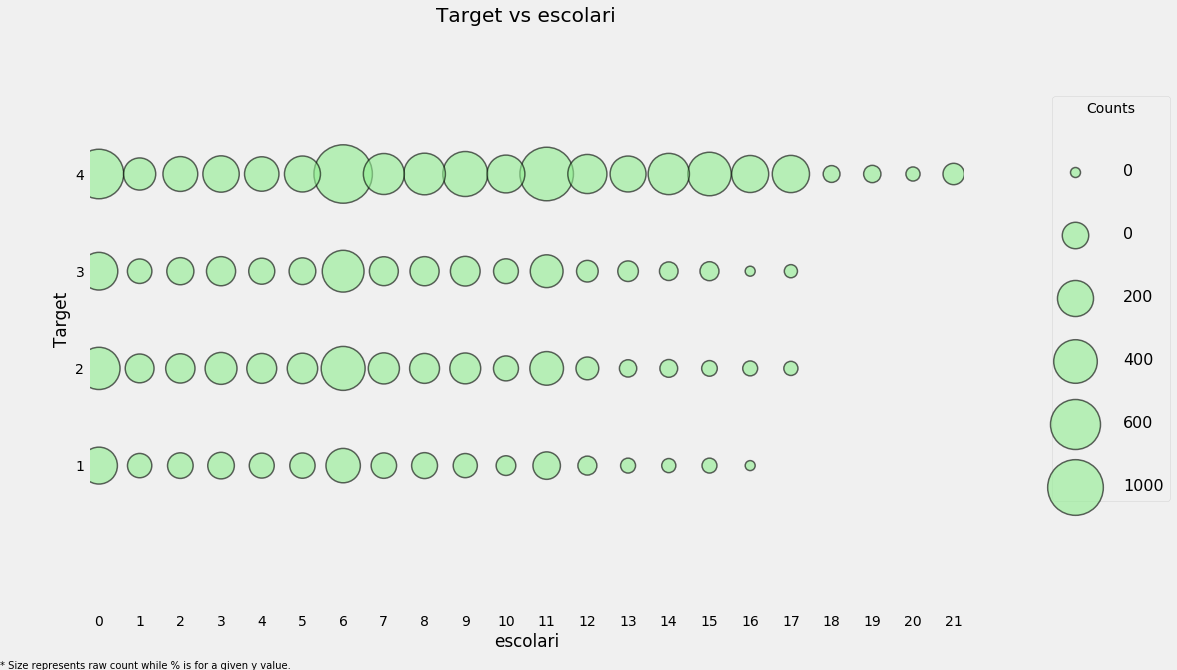

In [200]:
plot_categoricals('escolari', 'Target', data, annotate = False)

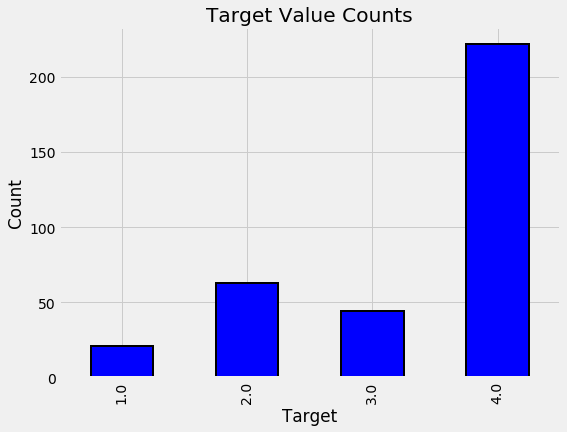

In [201]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

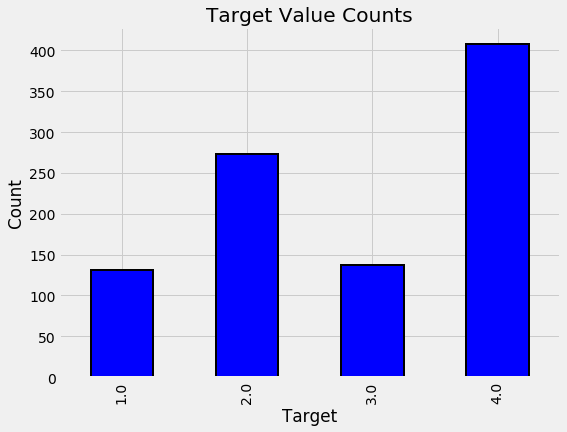

In [202]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

<br>

### Feature Engineering


#### process
- household level 과 individual level 로 나누기
- ind level data 에 대해서 적합한 함수 찾기
    - 서열변수는 통계적 메소드 적용
- ind 과 household level 합치기


#### 변수 카테고리 정의
1. Individual Variables: these are characteristics of each individual rather than the household
    - Boolean: Yes or No (0 or 1)
    - Ordered Discrete: Integers with an ordering
2. Household variables
    - Boolean: Yes or No
    - Ordered Discrete: Integers with an ordering
    - Continuous numeric
3. Squared Variables: derived from squaring variables in the data
4. Id variables: identifies the data and should not be used as features

In [203]:
id_ = ['Id', 'idhogar', 'Target']

In [204]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [205]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_count = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [206]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [207]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_count + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


Text(0.5, 1.0, 'Squared Age vs Age')

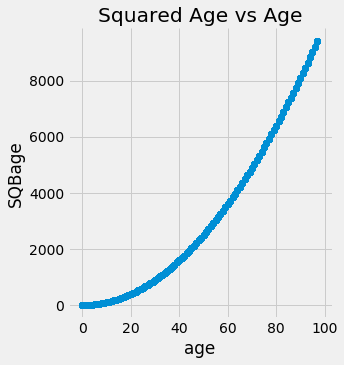

In [208]:
sns.lmplot('age', 'SQBage', data= data, fit_reg = False)
plt.title('Squared Age vs Age')

- age 와 sqredage 는 높은 상관관계가 있어서, 하나만 사용해도 무방
- 지워야 함


In [209]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

<br>

### Id Variables

#### HouseHold Level Variables
- subset 하기 > 가장 
- 상관관계 파악한 후, 높은 상관관계를 갖는 변수 중 하나 제거하기

In [210]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_count + hh_ordered]
heads.shape

(10307, 99)

In [211]:
corr_matrix = heads.corr()


# np.triu 상상감 행렬 upper triangle 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [212]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

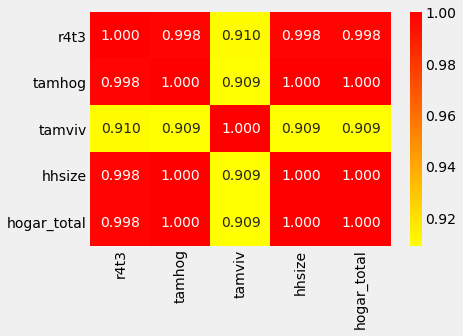

In [213]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
           annot = True, cmap = plt.cm.autumn_r, fmt = '.3f')

- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- hhsize, household size
- hogar_total, # of total individuals in the household

<br>

#### 상관관계 결과
- `tamhog` 와 `hhsize` / `hhsize` 와 `hogar_total` 는 높은 상관관계를 갖고 있음
- `r4r3` 와 `hhsize`

In [214]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

Text(0.5, 1.0, 'Household size vs number of persons living in the household')

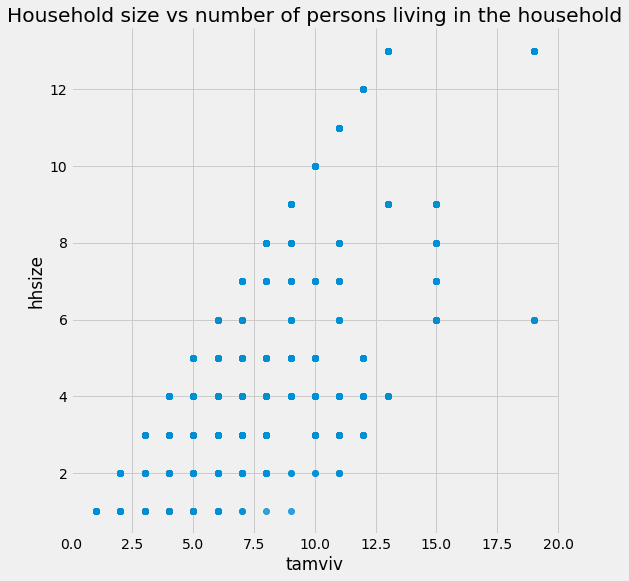

In [215]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg = False, size = 8)

plt.title('Household size vs number of persons living in the household')

- 가족 구성원 수 보다 people iving in the household 의 수가 더 많다

- 이 2가지 변수 사이의 차이를 새로운 변수로 구성할 수 있음

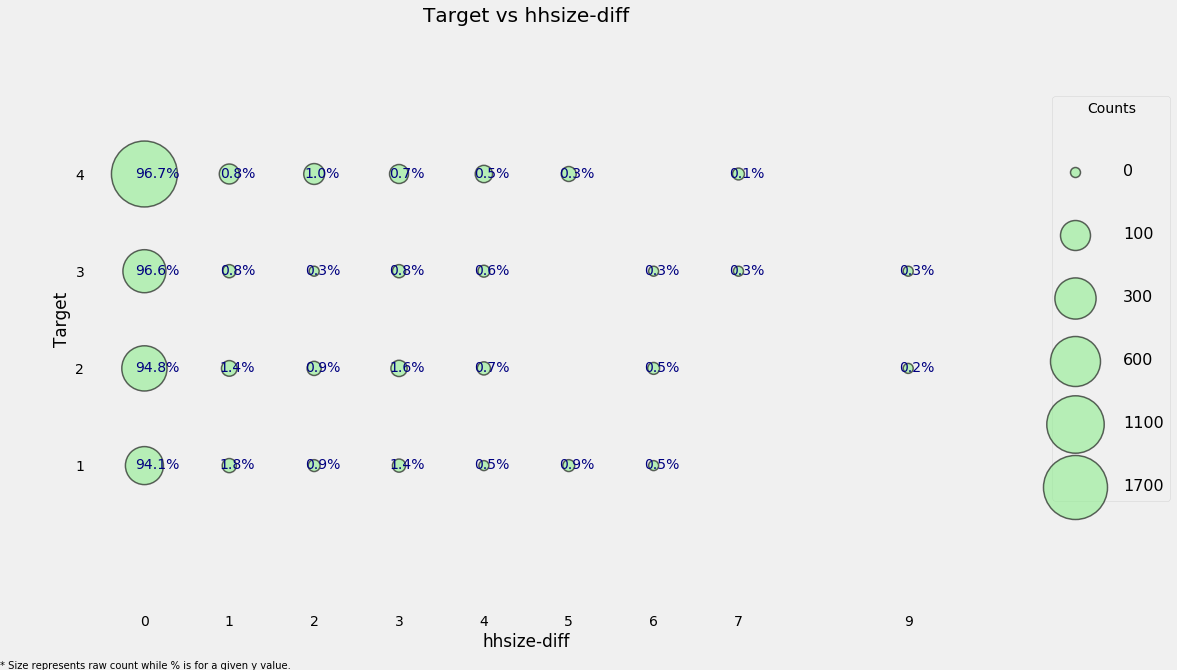

In [216]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [217]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

- 집의 전기 출처 ; public, coopele
- 이 2가지 옵션 중에서 전기를 얻지 않는다면, `noelec` 전기를 사용하지 않거나 `planpri` 공장에서 get


**전기 서열 변수 만들기**
- 0: No electricity
- 1: Electricity from cooperative
- 2: Electricity from CNFL, ICA, ESPH/JASEC
- 3: Electricity from private plant

In [218]:
heads[['public', 'coopele', 'noelec', 'planpri']].head()

public  coopele  noelec  planpri
0       1        0       0        0
1       1        0       0        0
2       1        0       0        0
5       1        0       0        0
8       1        0       0        0

In [219]:
elec = [] 

# iterrows() / iloc /loc 와 비슷하게 사용됨
for i , row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0) # 전기 사용 X
    elif row['coopele'] == 1:
        elec.append(1) # 협력체로 부터
    elif row['public'] == 1:
        elec.append(2) # 공공체
    elif row['planpri'] == 1:
        elec.append(3) # 공장
    else:
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()
    

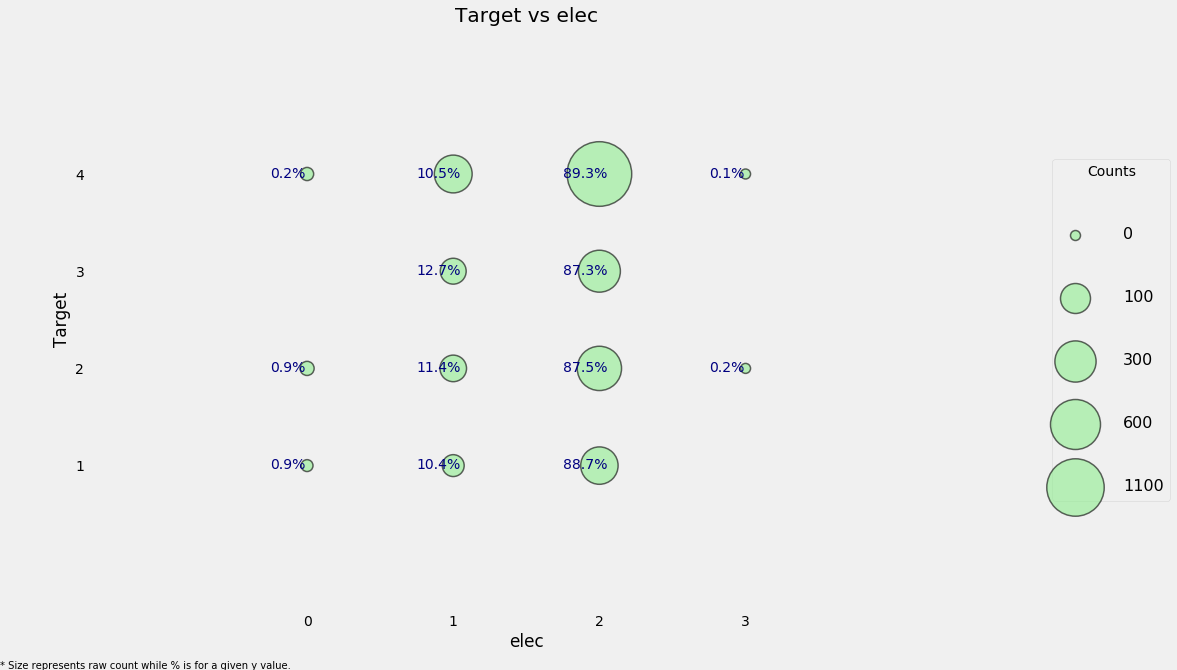

In [220]:
plot_categoricals('elec', 'Target', heads)

<br>

- `area2`
    - 시골에 있는 경우
- `urban` 과 겹치기 때문에 제거

In [221]:
heads = heads.drop(columns = 'area2')

pd.DataFrame(heads.groupby('area1')['Target'].value_counts(normalize = True))

Target
area1 Target          
0     4.0     0.582249
      2.0     0.176331
      3.0     0.147929
      1.0     0.093491
1     4.0     0.687030
      2.0     0.137688
      3.0     0.108083
      1.0     0.067199

- 도심 지역에 거주 하는 사람들이 가난률이 더 낮다

<br>

### Creating Ordinal Variables

- walls, roof, floor 이 각각의 칼럼을 갖고 있음
- bad < regular < good 의 형태로

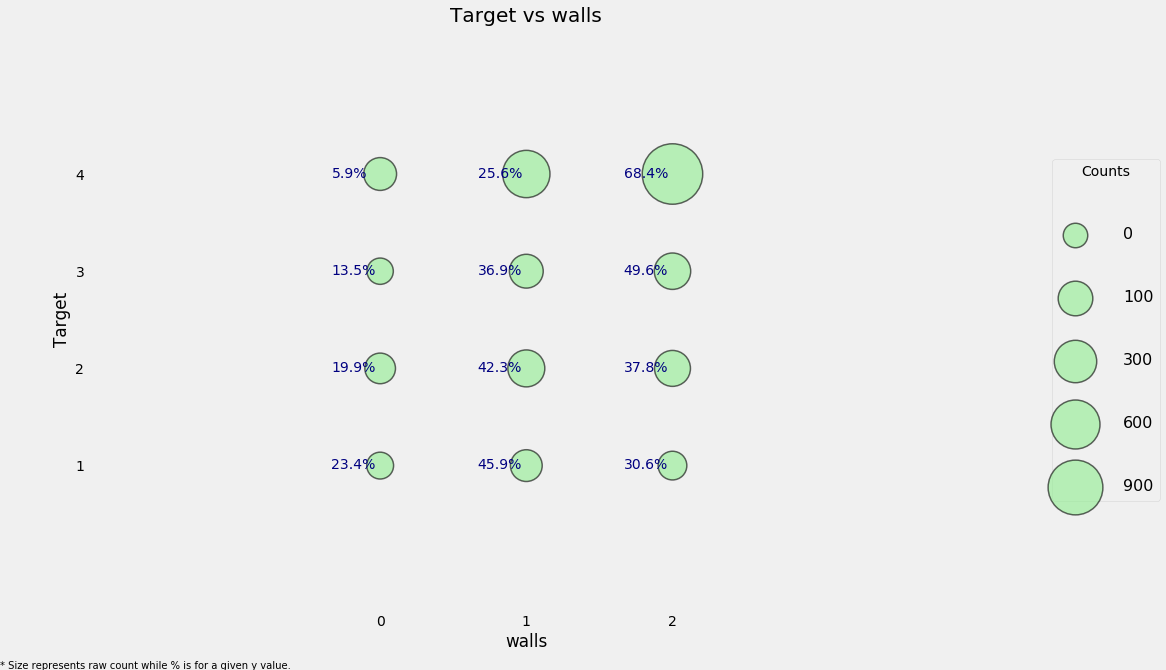

In [222]:
# wall 서열 변수
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

plot_categoricals('walls', 'Target', heads)

In [223]:
# 지붕 서열 변수

heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis = 1)

heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor 서열 변수
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis = 1)


<br>

### Feature Construction


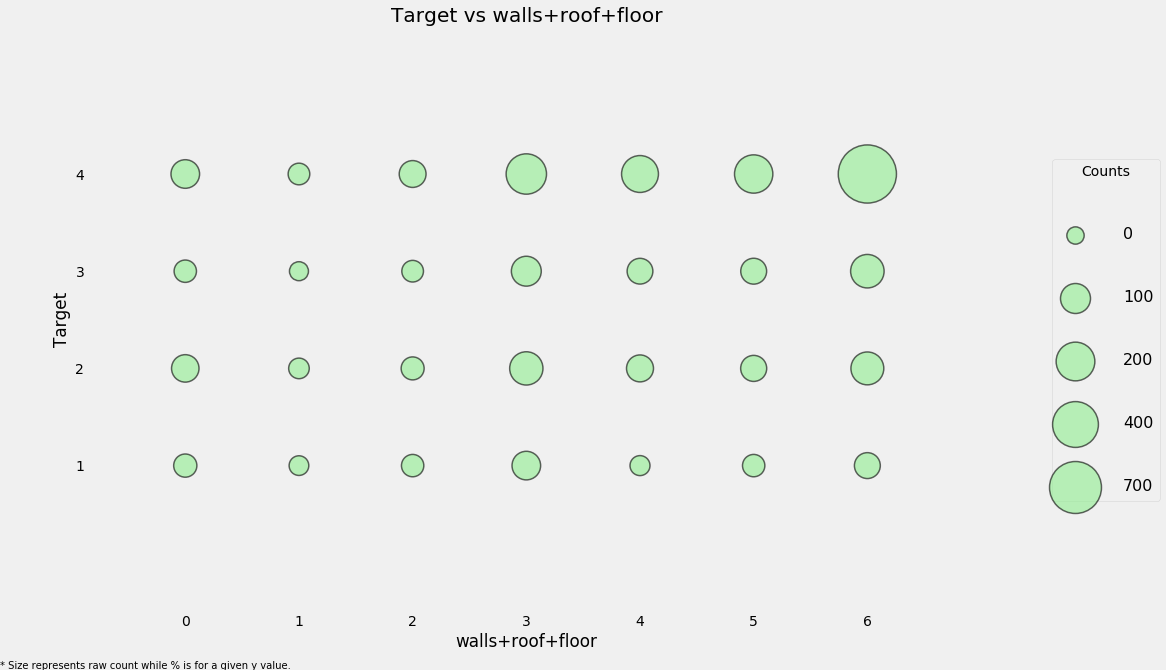

In [224]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

- 가장 가난한 사람이 집의 quality 가 가장 높다 ; 독특한 특성

In [225]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target':'Normalized Count'}).reset_index()

counts.head()

walls+roof+floor  Target  Normalized Count
0                 0     4.0          0.376404
1                 0     2.0          0.320225
2                 0     1.0          0.162921
3                 0     3.0          0.140449
4                 1     4.0          0.323529

In [226]:
pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).head()

Target
walls+roof+floor Target          
0                4.0     0.376404
                 2.0     0.320225
                 1.0     0.162921
                 3.0     0.140449
1                4.0     0.323529

<br>

- `warning`
    - 집의 부정적인 가치
    - 화장실, 전기, floor, water service , ceiling X

In [227]:
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))

Text(0.5, 1.0, 'Target vs Waring Variable')

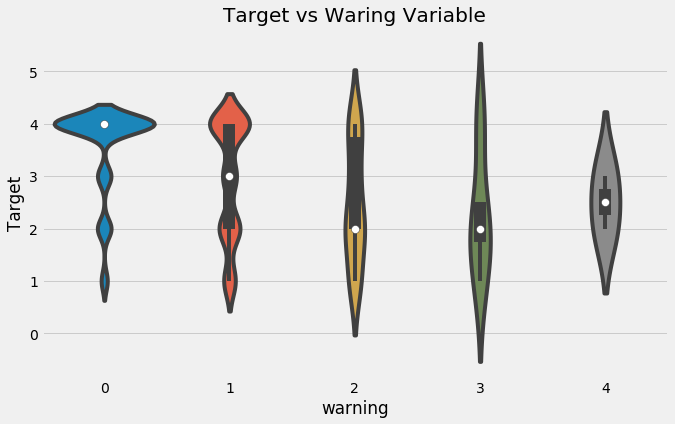

In [228]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y ='Target', data=heads)
plt.title('Target vs Waring Variable')

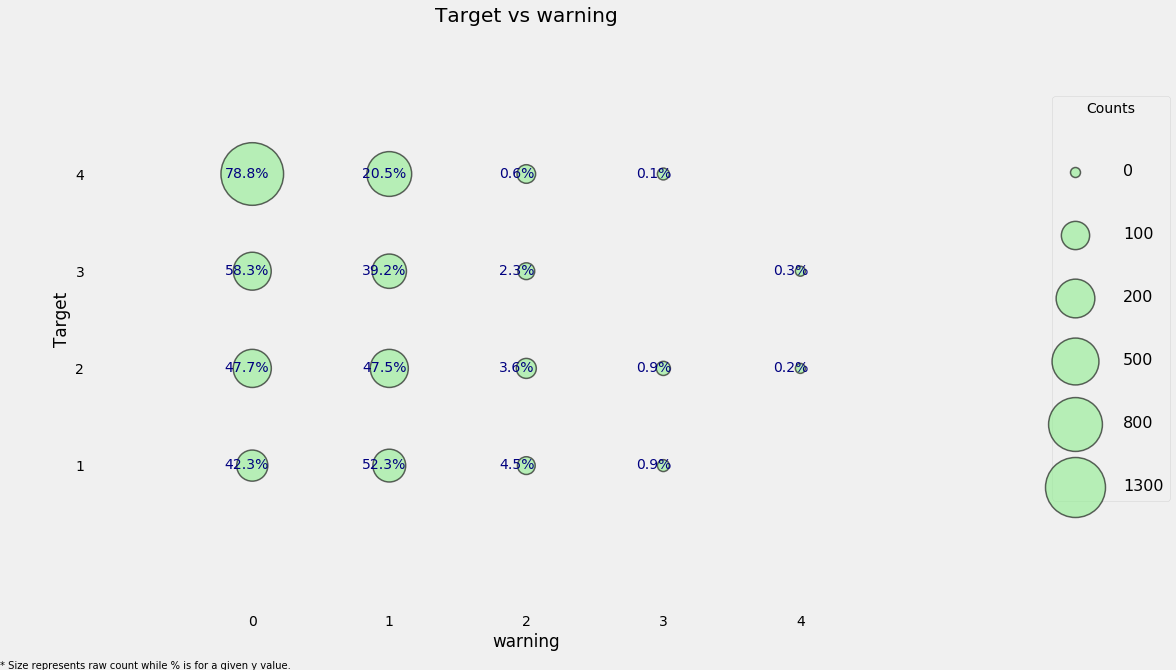

In [229]:
plot_categoricals('warning', 'Target', data= heads)

<br>

- `bonus`
    - 냉장고, 컴퓨터, 태블릿, 텔레비전

Text(0.5, 1.0, 'Target vs Bonus Variable')

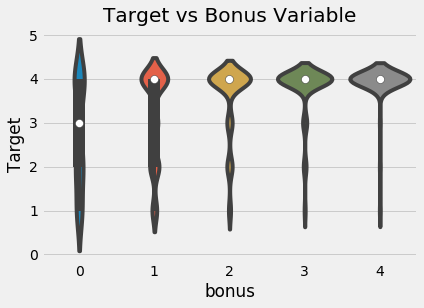

In [230]:
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1']>0) + heads['television'])

sns.violinplot('bonus', 'Target', data= heads, figsize = (10, 6))
plt.title('Target vs Bonus Variable')

<br>

### Per Capita Features

In [231]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

<br>

### Exploring Household Variables

- [피어슨](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D) : 선형 관계 파악
- [스피어만](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A7%8C_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98) : 두 변수 사이의 순위 사이의 통계적 의존도 파악 / 단조 함수 활용

In [232]:
from scipy.stats import spearmanr

In [233]:
def plot_corrs(x, y):
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0, 1]
    
    data =pd.DataFrame({'x': x, 'y':y})
    plt.figure(figsize = (6,4))
    sns.regplot('x', 'y', data= data, fit_reg = False)
    plt.title(f'Spearman: {round(spr, 2)}; Perason: {round(pcr, 2)}')
    

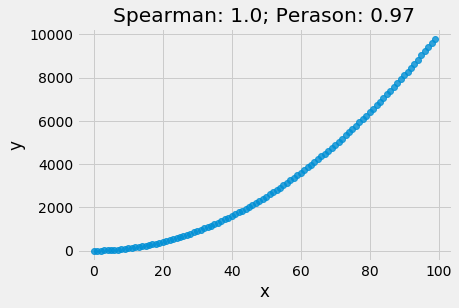

In [234]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

- 스피어만 상관관계 분석은 target 혹은 교육수준과 같은 서열 변수에 적합

In [235]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('음의 상관관계: ')
print(pcorrs.head())

print('\n 양의 상관관계: ')
print(pcorrs.dropna().tail())

음의 상관관계: 
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

 양의 상관관계: 
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


- warning, hogar_nin 등이 늘어날 수록 target 은 줄어듬( target 이 낮아질 수록 가난 수준은 높아짐)
- 즉, warning, hogar_nin 이 늘어나면 가난 수준은 상승

- `hogar_nin` : 0-19 아이의 수
    

In [236]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c)
        
        
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature': feats, 'scorr':scorr, 'pvalue':pvalues}).sort_values('scorr')
scorrs.head()

feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

In [237]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

# p value ; 귀무가설이 맞으 경우, 극단적인 결과를 얻을 확률
# 0.05 보다 작으면 주어진 가설이 맞을 확률이 95% 라는 의미
# 참고 : http://leoslife.com/archives/4352
# p=0.01 이라면
# 귀무가설 하에서 우리가 얻은 통계량이 관찰될 확률이 1% -> 매우 낮다 -> 귀무가설을 반박할 수 있다.

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [238]:
pcorrs.head()

feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

In [239]:
scorrs.head()

feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

In [240]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [241]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

- 가장 큰 차이가 보이는 변수는 `dependency` 

Text(0.5, 1.0, 'Target vs Denpendency')

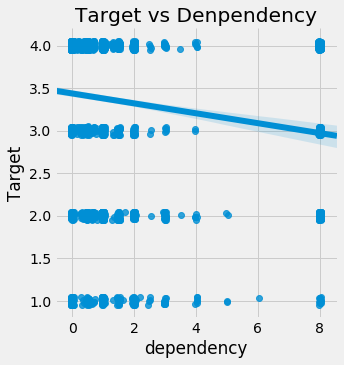

In [242]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05)

plt.title('Target vs Denpendency')

- 약한 음의 관계이긴 해도, 부양 가족이 많을 수록, 가난 수준이 높다

Text(0.5, 1.0, 'Target vs Rooms Per Capita')

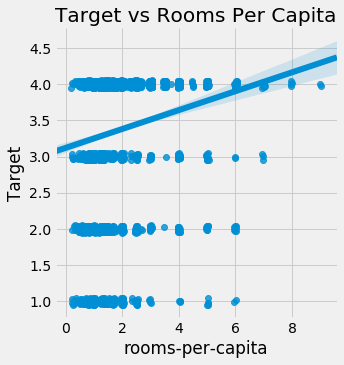

In [243]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter = 0.05, y_jitter = 0.05)

plt.title('Target vs Rooms Per Capita')

<br>

### Correlation Heatmap

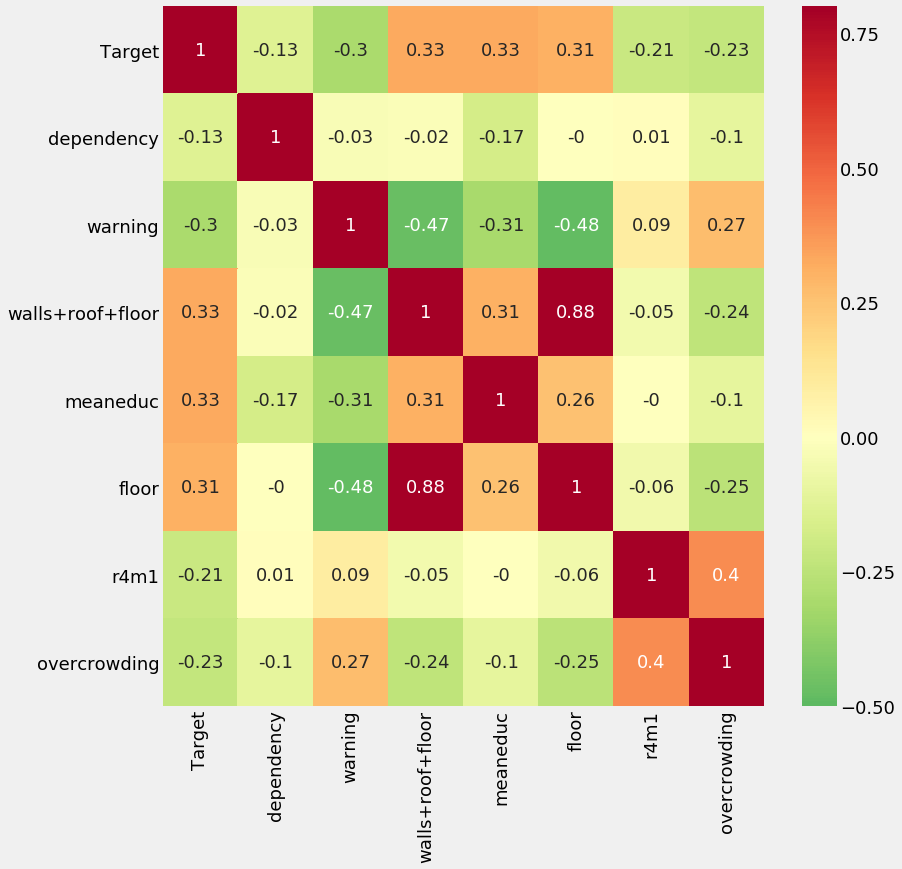

In [244]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']


corr_mat = train_heads[variables].corr().round(2)

plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))

sns.heatmap(corr_mat, vmin = - 0.5, vmax = 0.8, center = 0,
           cmap = plt.cm.RdYlGn_r, annot = True)

- `floor` 와 `walls+roof+floor` 은 높은 상관관계가 있다
- 다중공산성 문제가 있을 수 있음

#### Features Plot

Text(0.5, 1.05, 'Feature Plots Colored By Target')

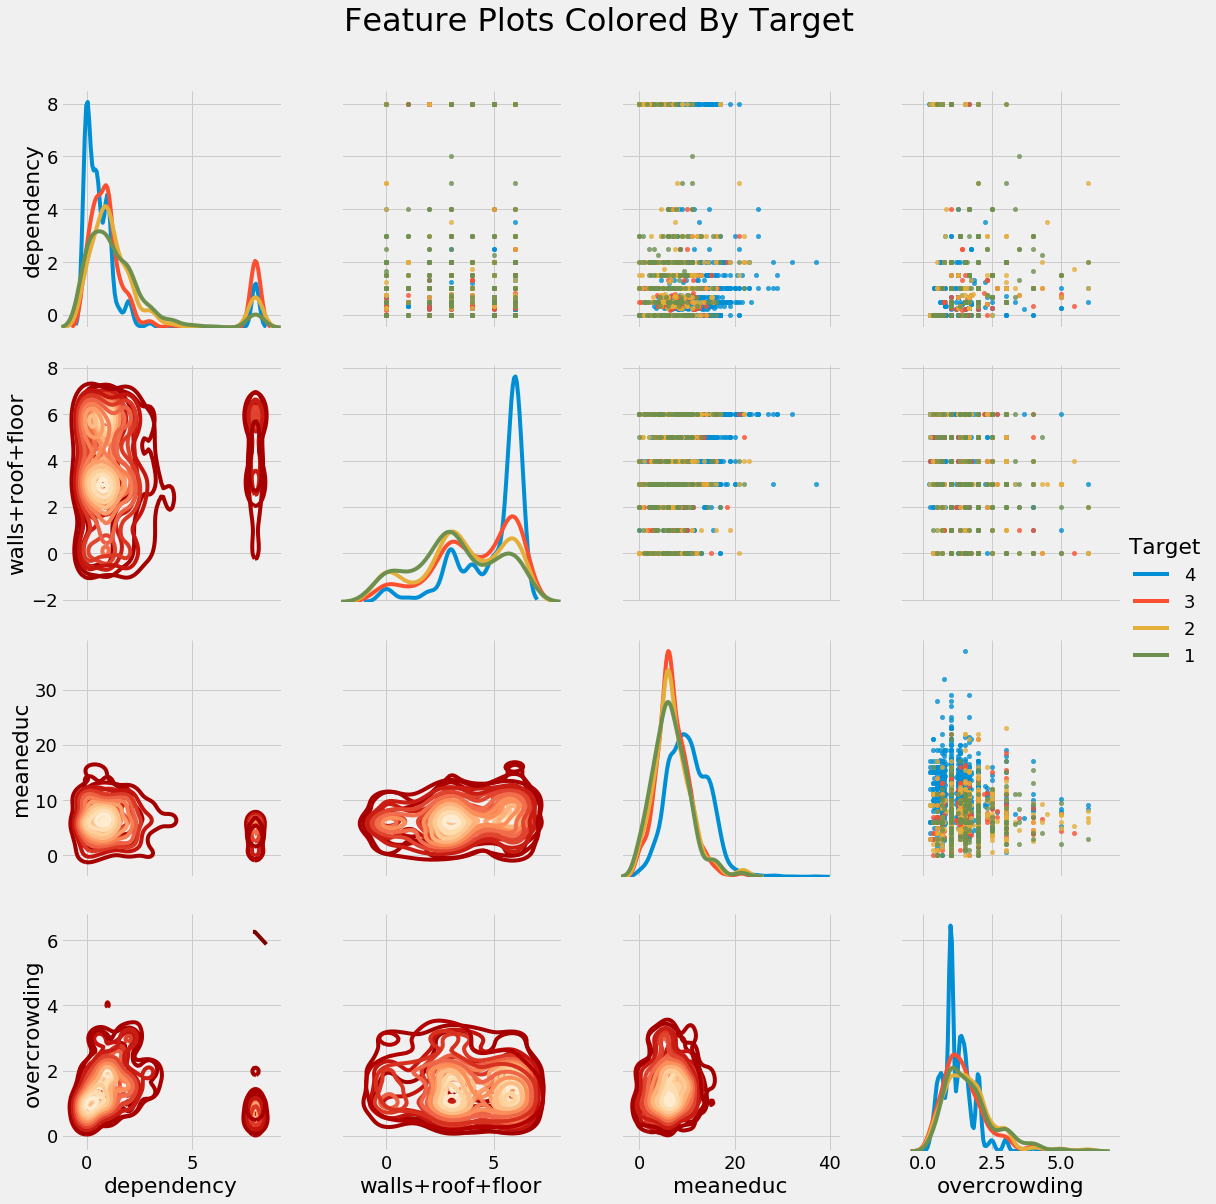

In [245]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey = False, hue = 'Target', hue_order = [4, 3, 2, 1],
                   vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)
grid = grid.add_legend()

plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05)

In [246]:
household_feats = list(heads.columns)

<br>

### Individual Level Variables

In [247]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

<br>

#### Redundant Individual Variables

In [248]:
corr_matrix = ind.corr()

# 상삼각행렬
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))

to_drop =[column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [249]:
ind = ind.drop(columns = 'male')

<br>

#### 서열 변수

- `instlevel_` : 교육 양
    - `instlevel9` : 교육 X

In [250]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

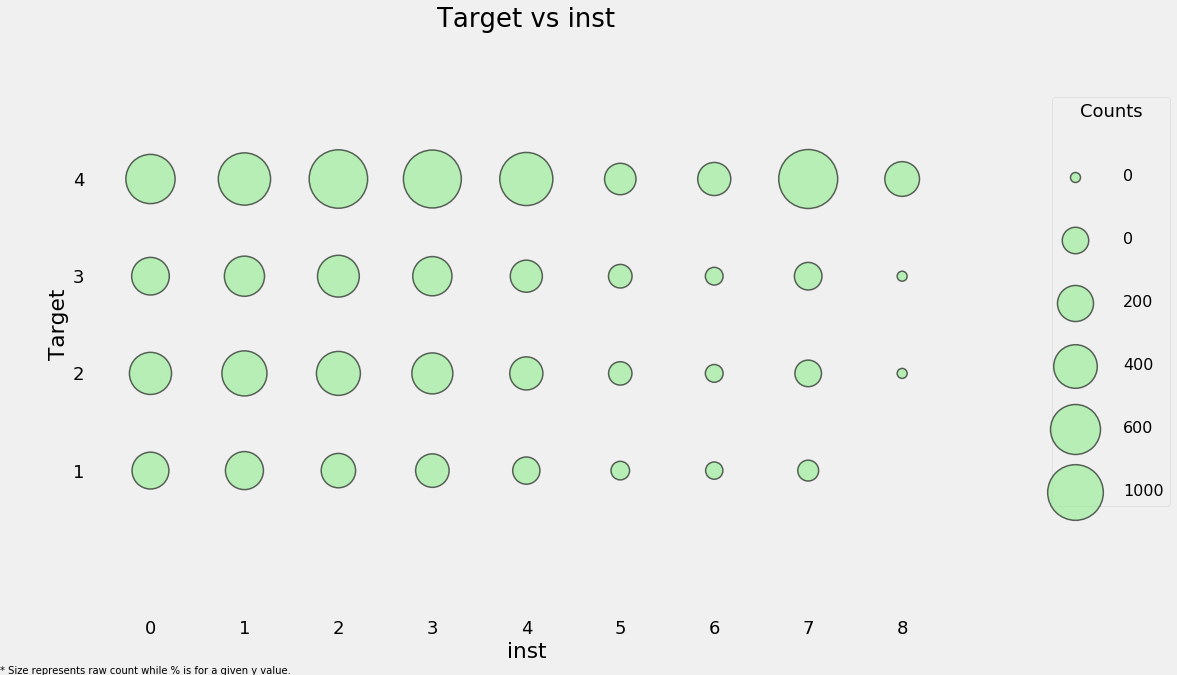

In [251]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)
plot_categoricals('inst', 'Target', ind, annotate = False)

Text(0.5, 1.0, 'Education Distribution by Target')

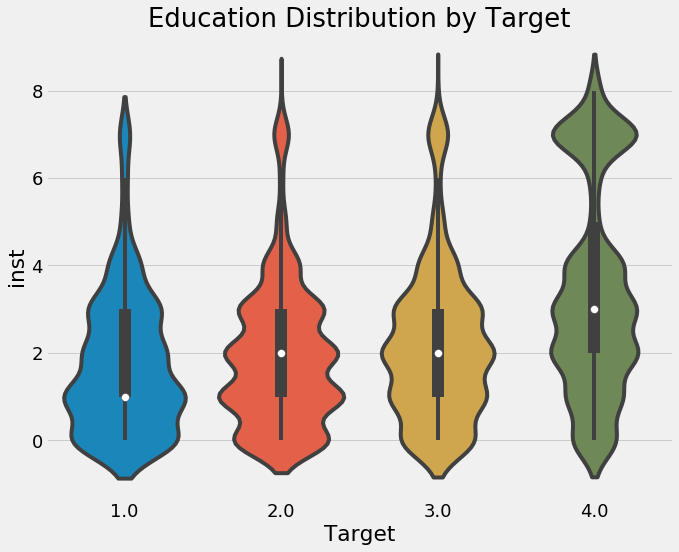

In [252]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data= ind)
plt.title('Education Distribution by Target')

In [253]:
ind.shape

(33413, 40)

<br>

### Feature Construction

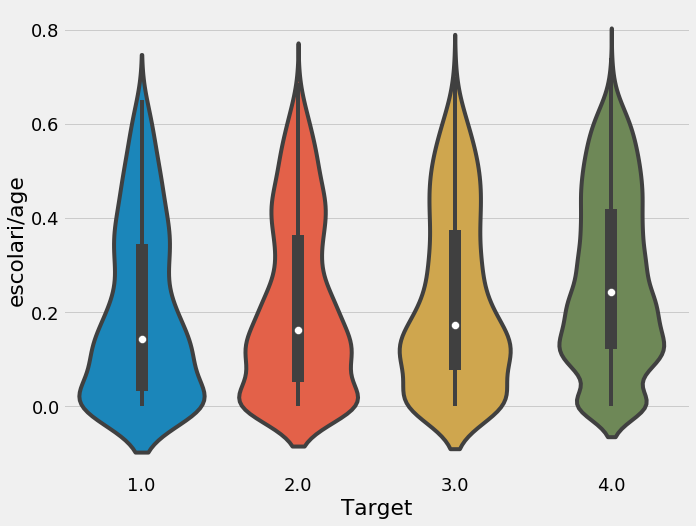

In [254]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data =ind)

In [255]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

In [256]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [257]:
new_col = []

for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [258]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8,9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

<br>

#### Feature Selection

In [259]:
corr_matrix = ind_agg.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) >  0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [260]:
ind_agg = ind_agg.drop(columns = to_drop)

ind_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [261]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0          0          0        0        0   
4          0          0          0          0          0        1        0   

   epared3  eviv1  eviv2  eviv3  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0        0      1      0      0          0          0          1          0   
1        0      0      1      0          0          0          1          0   
2        0      0      0      1          1          0          0          0   
3        1      0

In [262]:
corrs = final.corr()['Target']
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [263]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

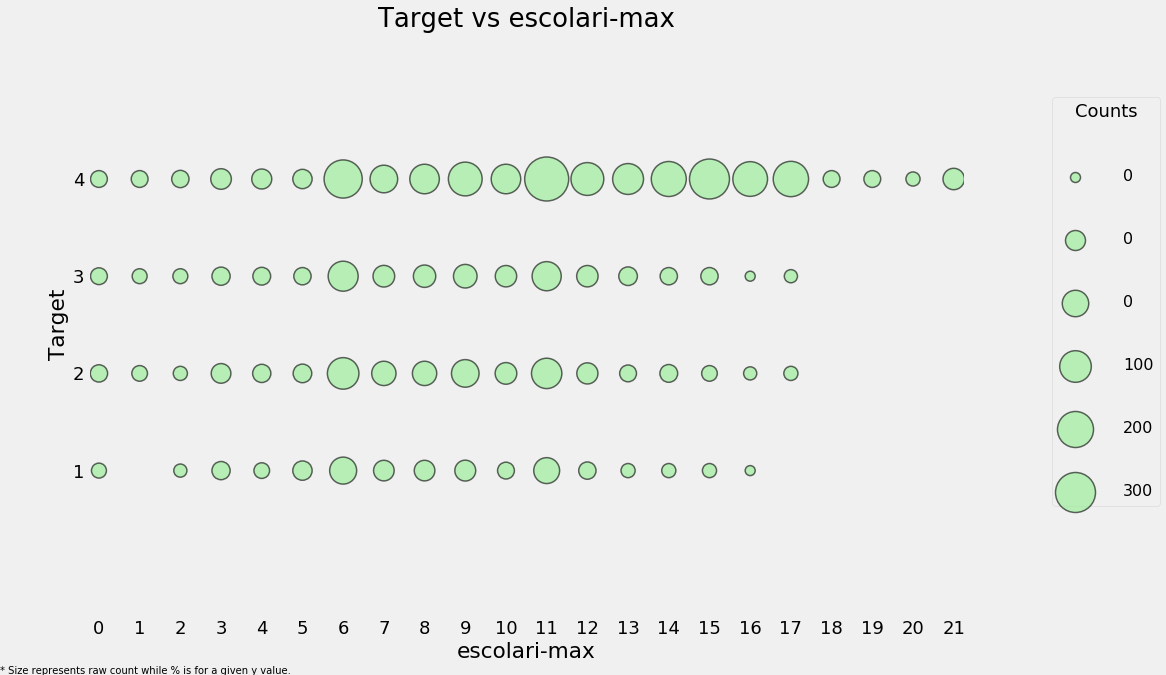

In [264]:
plot_categoricals('escolari-max', 'Target', final, annotate= False)

Text(0.5, 1.0, 'Max Schooling by Target')

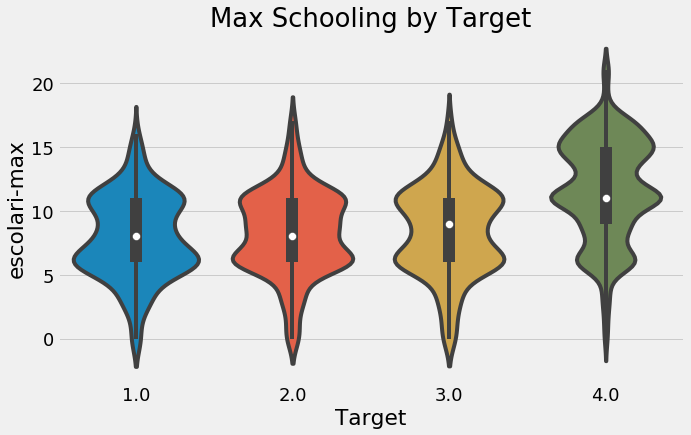

In [265]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'escolari-max', data =final)
plt.title('Max Schooling by Target')

Text(0.5, 1.0, 'Average Schooling by Target')

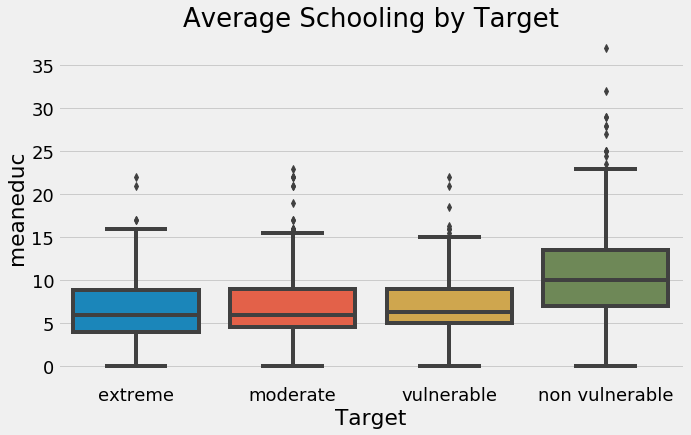

In [266]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data =final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target')

Text(0.5, 1.0, 'Overcrowding by Target')

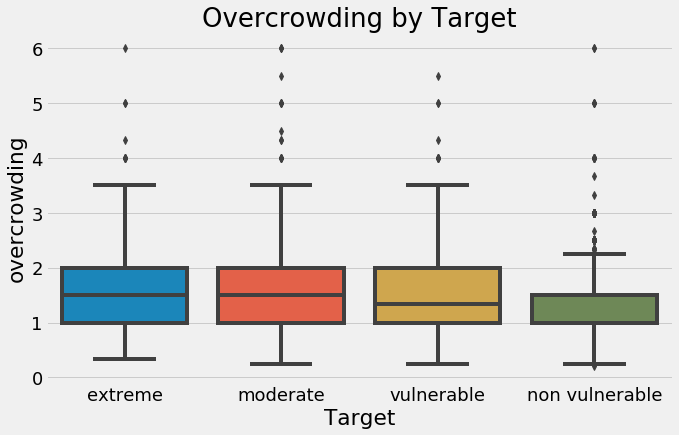

In [267]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y ='overcrowding', data = final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target')

In [268]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female':'female-head'})

In [269]:
final.groupby('female-head')['Target'].value_counts(normalize = True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

Text(0.5, 1.0, 'Target by Female Head of Household')

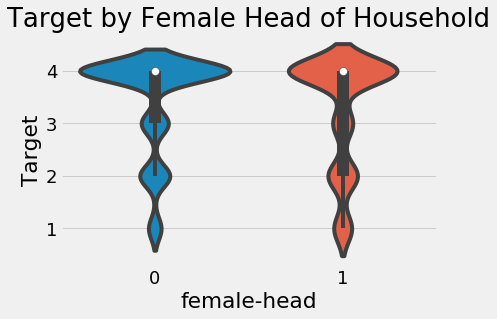

In [270]:
sns.violinplot(x = 'female-head', y ='Target', data =final)
plt.title('Target by Female Head of Household')

Text(0.5, 1.0, 'Average Education by Target and Female Head of Household')

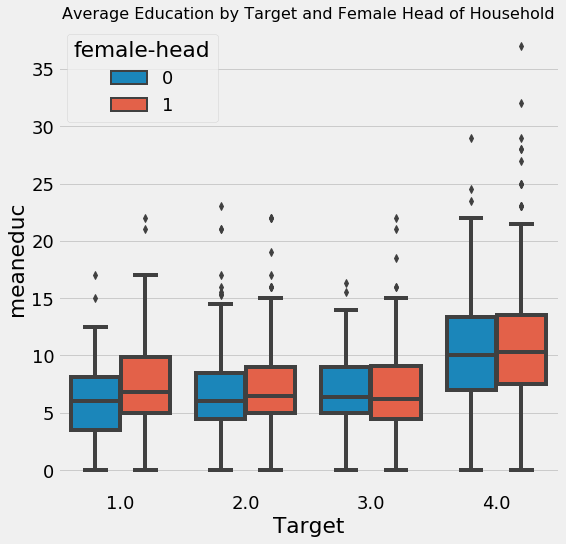

In [271]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y ='meaneduc', hue = 'female-head', data= final)
plt.title('Average Education by Target and Female Head of Household', size = 16)

In [272]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

- 여자가 평균 교육 수준이 남자보다 조금 더 높다

<br>

### Machine Learning Modeling

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [274]:
scorer = make_scorer(f1_score, greater_is_better = True, average = 'macro')

In [275]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set= final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

submission_base = test[['Id', 'idhogar']].copy()

In [276]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), ('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [277]:
model = RandomForestClassifier(n_estimators=100, random_state = 10, n_jobs = -1)

cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0313


In [278]:
model.fit(train_set, train_labels)

feature_importances = pd.DataFrame({'feature': features, 'importance':model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

In [279]:
def plot_feature_importances(df, n = 10, threshold = None):
    plt.style.use('fivethirtyeight')
    
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    plt.rcParams['font.size'] = 12
    
    df.loc[:n, :].plot.barh(y = 'importance_normalized', x ='feature', color = 'darkgreen',
                           edgecolor = 'k', figsize = (12, 8), legend = False, linewidth = 2)
    
    plt.xlabel('Normalized Importance', size = 18)
    plt.ylabel('')
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold :
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16)
        plt.ylabel('Cumulative Importance', size= 16)
        plt.title('Cumulative Feature Importance', size =18)
        
        importance_index = np.min(np.where(df['cumulative_importance']>threshold))
        
        plt.vlines(importance_index + 1, ymin =0, ymax = 1.05, linestyle = '--', colors = 'red')
        plt.show()
        
        print('{} features required for {:.0f}% of cumulative importance'.format(importance_index + 1, 100*threshold))
        return df

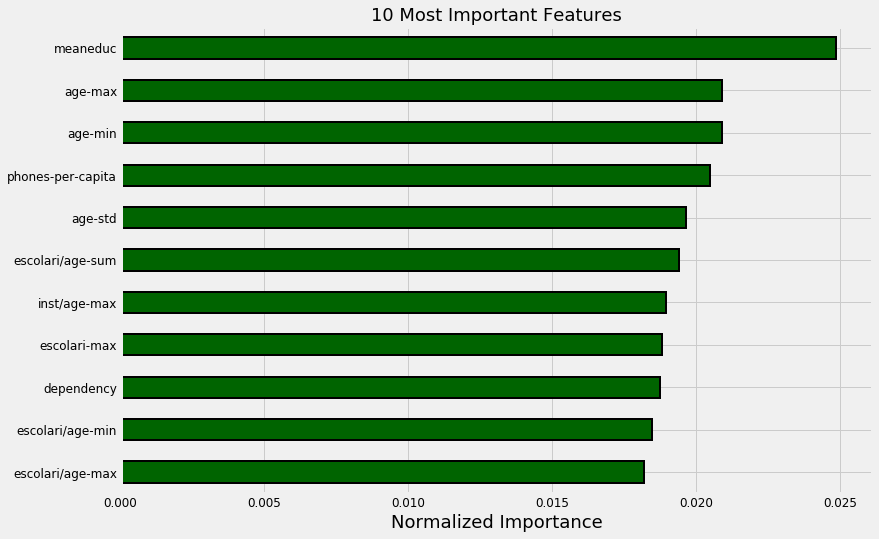

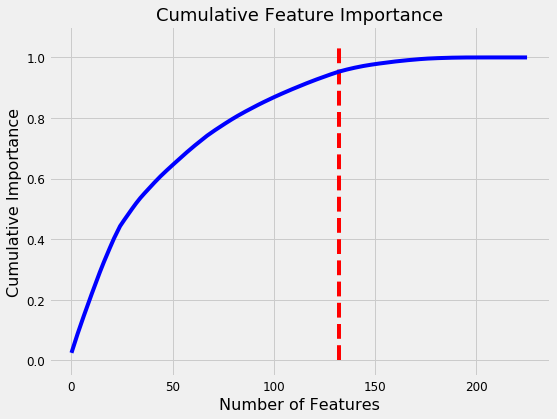

132 features required for 95% of cumulative importance


In [280]:
norm_fi = plot_feature_importances(feature_importances, threshold= 0.95)

In [281]:
def kde_target(df, variable):
    colors = {1: 'red', 2:'orange', 3:'blue', 4:'green'}
    
    plt.figure(figsize = (12, 8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(),
                   label = f'Poverty Level: {level}',
                    color = colors[int(subset['Target'].unique())])
    plt.xlabel(variable)
    
    plt.ylabel('Density')
    plt.title('{} Distribution'.format(variable.capitalize()))

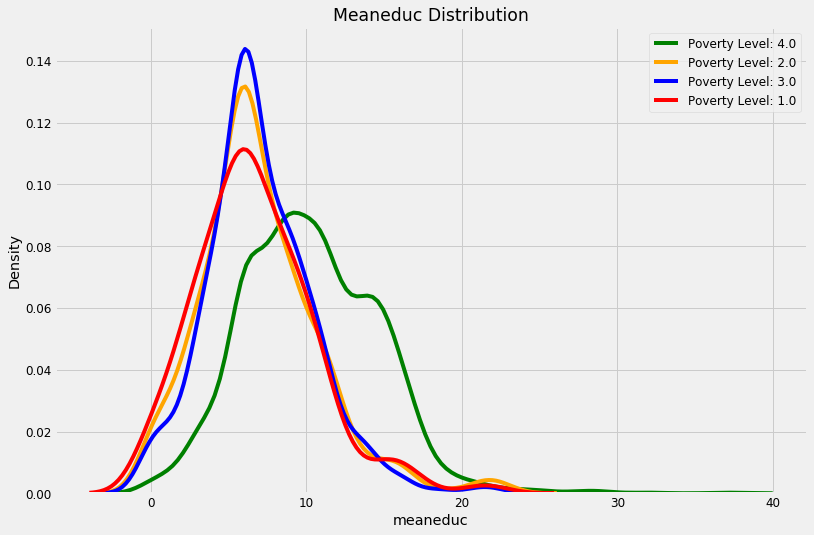

In [282]:
kde_target(final, 'meaneduc')

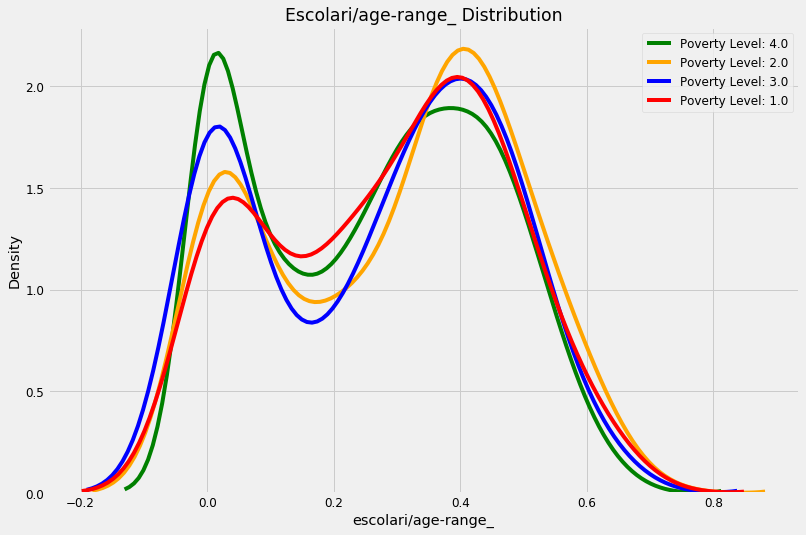

In [283]:
kde_target(final, 'escolari/age-range_')

In [284]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [285]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results = None):
    cv_scores = cross_val_score(model, train, train_labels, cv=10, scoring = scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model':name, 'cv_mean':cv_scores.mean(), 'cv_std':cv_scores.std()},
                                                        index = [0]), ignore_index = True)
        return model_results

In [286]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)

10 Fold CV Score: 0.28346 with std: 0.04484


In [287]:
model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.17935 with std: 0.03867


In [288]:
model_results = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes = (32, 64, 128, 64, 32)), 'MLP', model_results)

10 Fold CV Score: 0.30381 with std: 0.05011


In [289]:
model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(), 'LDA', model_results)

10 Fold CV Score: 0.32217 with std: 0.05984


In [290]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27896 with std: 0.03675


In [291]:
for n in [5, 10, 20]:
    print('\n KNN with {} neighbors\n'.format(n))
    
    model_results = cv_model(train_set, train_labels, KNeighborsClassifier(n_neighbors = n),
                                                                          f'knn-{n}', model_results)


 KNN with 5 neighbors

10 Fold CV Score: 0.35078 with std: 0.03829

 KNN with 10 neighbors

10 Fold CV Score: 0.32153 with std: 0.03028

 KNN with 20 neighbors

10 Fold CV Score: 0.31039 with std: 0.04974


In [292]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                        'EXT', model_results)

10 Fold CV Score: 0.32215 with std: 0.04671


<br>

#### Comparing Model Performance

In [293]:
model_results = cv_model(train_set, train_labels, RandomForestClassifier(100, random_state = 10), 'RF', model_results)

10 Fold CV Score: 0.34386 with std: 0.03134


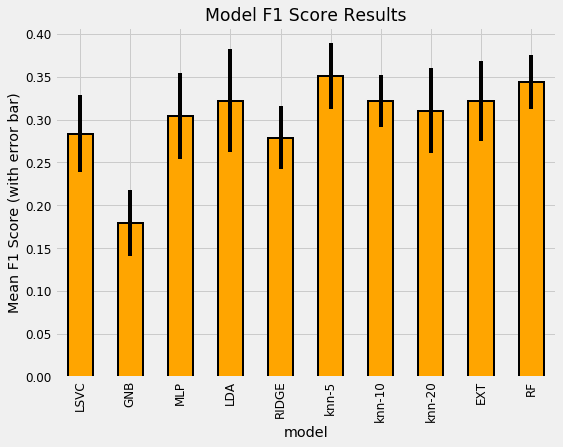

In [294]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

<br>

### Making a Submission

In [295]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [296]:
def submit(model, train, train_labels, test, test_ids):
    model.fit(train, train_labels)
    
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar':test_ids, 'Target':predictions})
    
    submission = submission_base.merge(predictions, on = 'idhogar', how='left').drop(columns = ['idhogar'])
    
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    return submission

In [297]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, random_state = 10, n_jobs = -1), 
                      train_set, train_labels, test_set, test_ids)

# rf_submission.to_csv('rf_submission.csv', inex = False)

<br>

### Feature Selection

In [298]:
train_set = pd.DataFrame(train_set, columns = features)

corr_matrix = train_set.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'elec', 'v18q-count', 'female-sum']

In [299]:
train_set = train_set.drop(columns = to_drop, axis= 1)

AttributeError: 'DataFrame' object has no attribute 'shpae'

In [300]:
train_set.shape

(2973, 222)

In [301]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

<br>

#### 재귀적으로 특성 제거 
- `rfecv` : Recursive Feature Elimination
    - `RFE` 이면의 아이디어는 선형 회귀나 SVM 처럼 파라미터를 가진 모델을 반복적으로 훈련하는 것임
    - 맨 처음 훈련할 땐, 모든 파라미터가 포함됨. 그 다음 가장 작은 파라미터를 가진 특성을 찾음.
    - 이런 특성은 덜 중요하다는 것을 의미하므로 사용했던 특성 중에서 제거함
    - CV를 사용한 RFE = RFECV
        - `estimator` : 훈련할 모델의 객체
        - `step` : 매 반복에서 삭제할 특성의 개수나 비율
        - `scoring` : 교차 검증동안 사용할 모델의 평가지표
    - 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식 
        
        
출처 : https://wikidocs.net/16599
    

In [302]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state = 10, n_estimators=100, n_jobs = -1)

selector = RFECV(estimator, step = 1, cv=3, scoring = scorer, n_jobs = -1)

In [303]:
selector

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

In [304]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1,
   scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

58

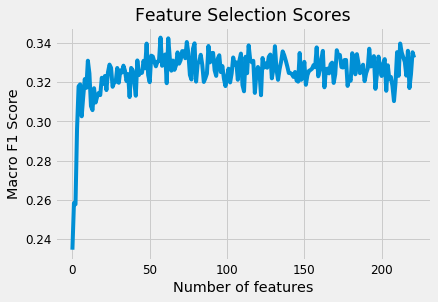

In [307]:
plt.plot(selector.grid_scores_)

plt.xlabel('Number of features')
plt.ylabel('Macro F1 Score')
plt.title('Feature Selection Scores')
selector.n_features_

In [305]:
rankings = pd.DataFrame({'feature':list(train_set.columns), 'rank':list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
73               r4h2     1
173    instlevel3-std     1
130  estadocivil7-std     1
129  estadocivil7-sum     1
198      escolari-sum     1
197      escolari-max     1
86           bedrooms     1
177    instlevel4-std     1
109        female-std     1
187    instlevel8-sum     1

In [308]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [310]:
selected_features = train_set.columns[np.where(selector.ranking_ == 1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [311]:
(selector.ranking_ == 1).sum()

58

In [312]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results )

10 Fold CV Score: 0.36248 with std: 0.0529


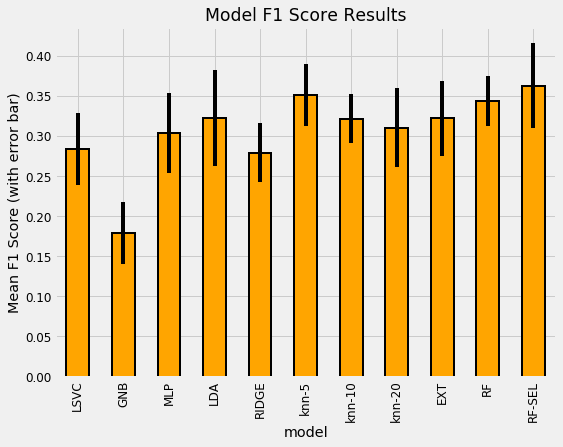

In [313]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8,6),
                                 yerr = list(model_results['cv_std']), edgecolor = 'k',
                                 linewidth = 2)

plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace = True)

In [314]:
model_results

model   cv_mean    cv_std
0     LSVC  0.283461  0.044843
1      GNB  0.179346  0.038671
2      MLP  0.303814  0.050113
3      LDA  0.322170  0.059842
4    RIDGE  0.278965  0.036746
5    knn-5  0.350777  0.038290
6   knn-10  0.321534  0.030284
7   knn-20  0.310388  0.049744
8      EXT  0.322154  0.046709
9       RF  0.343859  0.031338
10  RF-SEL  0.362477  0.052901

<br>

### 모델 업그레이드 : GBM

In [315]:
def macro_f1_score(labels, predictions):
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis = 0)
    
    metric_value = f1_score(labels, predictions, average = 'macro')
    
    return 'macro_f1', metric_value, True

In [336]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        
        # Feature importances
        importances += model.feature_importances_ / nfolds   
        
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

<br>

#### Cross Validation with Early Stopping Notes

In [ ]:
%%write file

In [337]:
%%capture --no-display

predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds = True)

'Fold 1, Validation Score: 0.42219, Estimators Trained: 0'

'Fold 2, Validation Score: 0.37835, Estimators Trained: 0'

'Fold 3, Validation Score: 0.39756, Estimators Trained: 0'

'Fold 4, Validation Score: 0.4299, Estimators Trained: 0'

'Fold 5, Validation Score: 0.40469, Estimators Trained: 0'

'5 cross validation score: 0.40654 with std: 0.01827.'

In [338]:
predictions.head()

1         2         3         4    idhogar  fold  Target  confidence
0  0.000403  0.000339  0.001778  0.997480  72958b30c     1       4    0.997480
1  0.054213  0.005152  0.005158  0.935476  5b598fbc9     1       4    0.935476
2  0.005727  0.081285  0.018159  0.894829  1e2fc704e     1       4    0.894829
3  0.000632  0.000769  0.000908  0.997691  8ee7365a8     1       4    0.997691
4  0.003905  0.008080  0.003737  0.984278  ff69a6fc8     1       4    0.984278

Text(0.5, 1.05, 'Distribution of Confidence by Fold and Target')

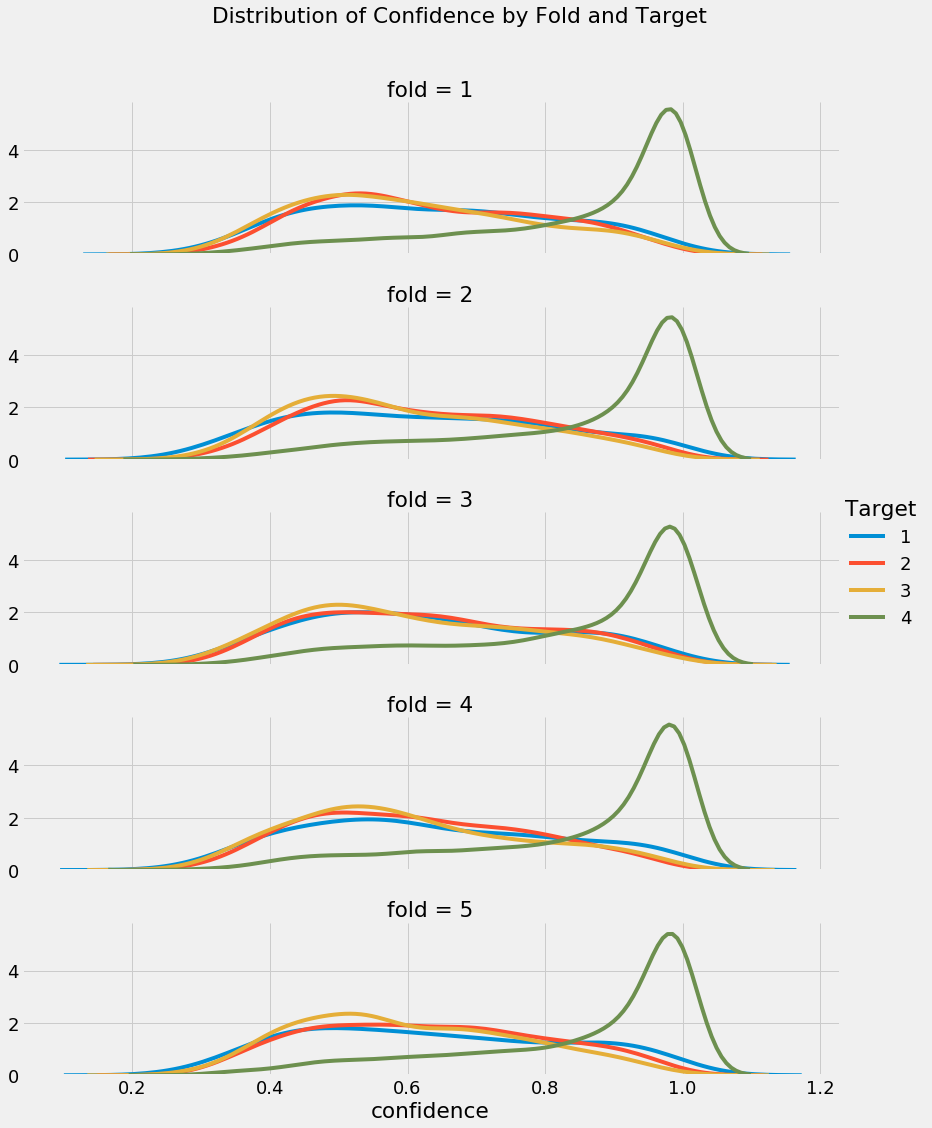

In [339]:
plt.rcParams['font.size'] = 18

g = sns.FacetGrid(predictions, row='fold', hue='Target', size = 3, aspect = 4)
g.map(sns.kdeplot, 'confidence')

g.add_legend()

plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05)

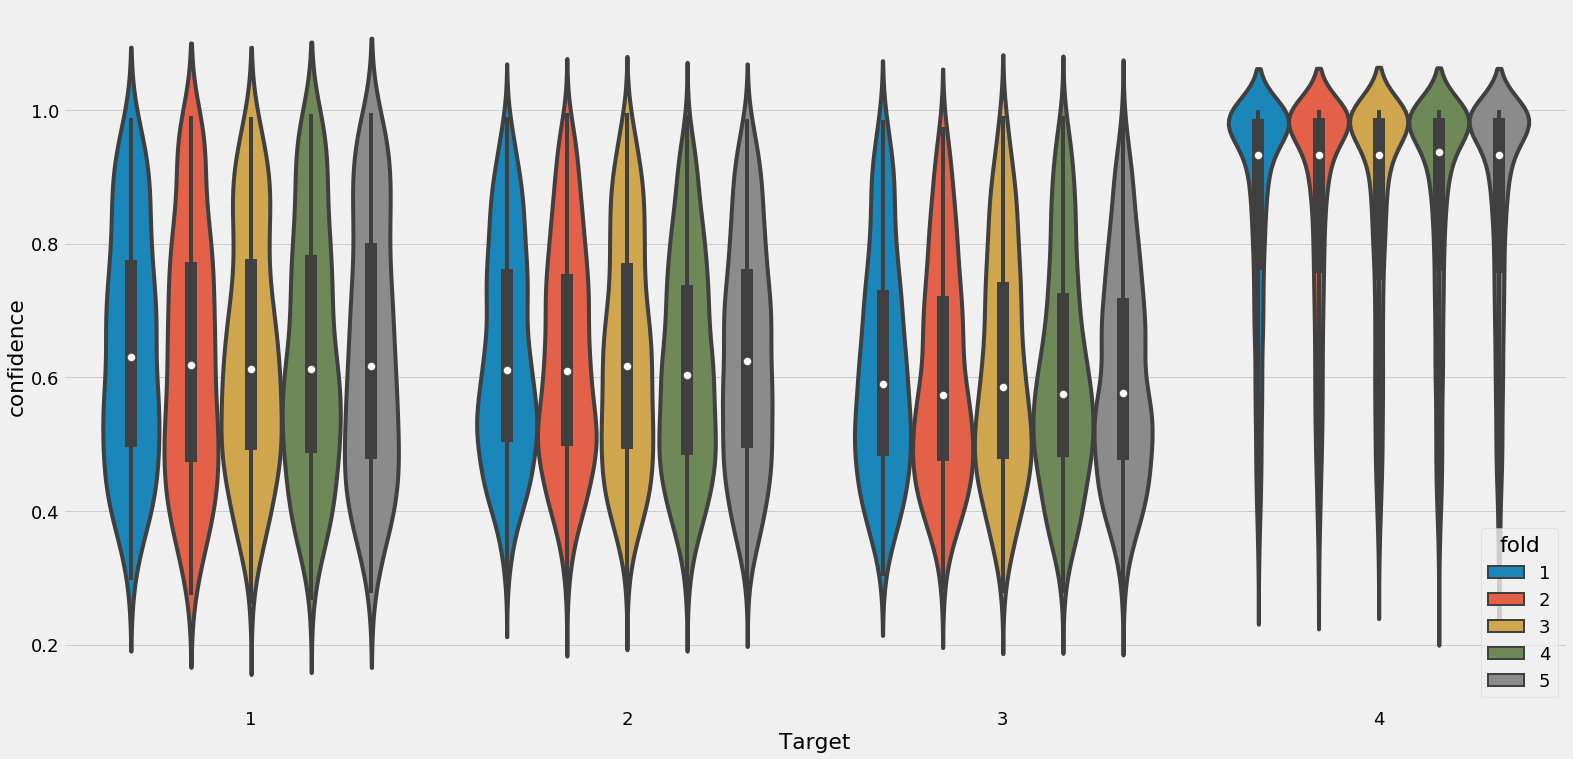

In [340]:
plt.figure(figsize = (24, 12))

sns.violinplot(x = 'Target', y ='confidence', hue='fold', data=predictions)

<br>

#### Meta Ensemble by averaging predictions from several gbms

Text(0.5, 1.0, 'Confidence by Target')

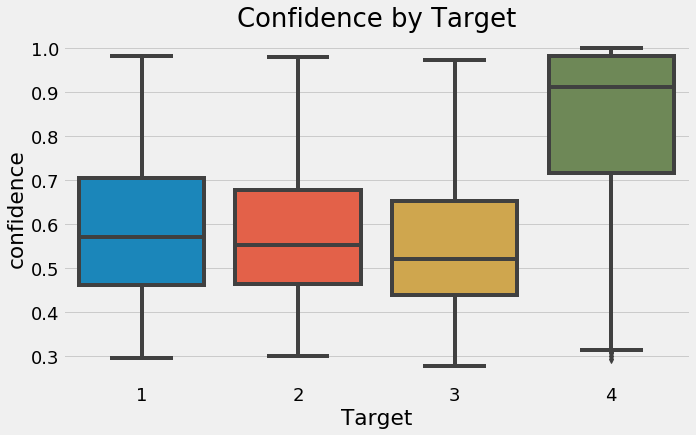

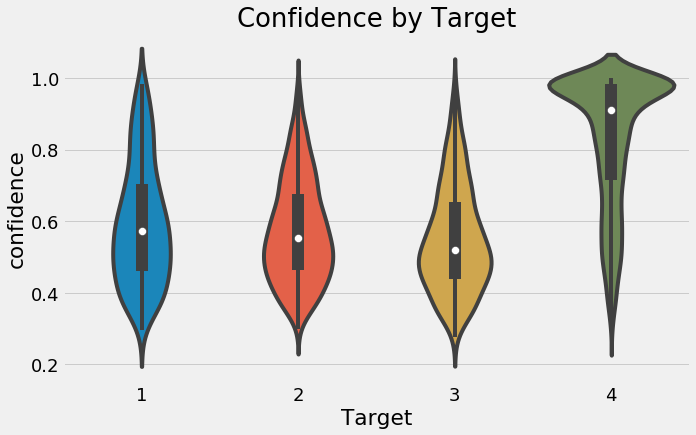

In [341]:
predictions = predictions.groupby('idhogar', as_index= False).mean()


predictions['Target'] = predictions[[1,2,3,4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1,2,3,4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])


plt.figure(figsize = (10,6))
sns.boxplot(x = 'Target', y ='confidence', data=predictions)
plt.title('Confidence by Target')

plt.figure(figsize = (10,6))
sns.violinplot(x = 'Target', y ='confidence', data=predictions)
plt.title('Confidence by Target')

In [335]:
%%capture

submission, gbm_fi, valied_scores = model_gbm(train_set, train_labels, test_set, test_ids, return_preds = False)

# submission.to_csv('gbm_baseline.csv')

KeyboardInterrupt: 

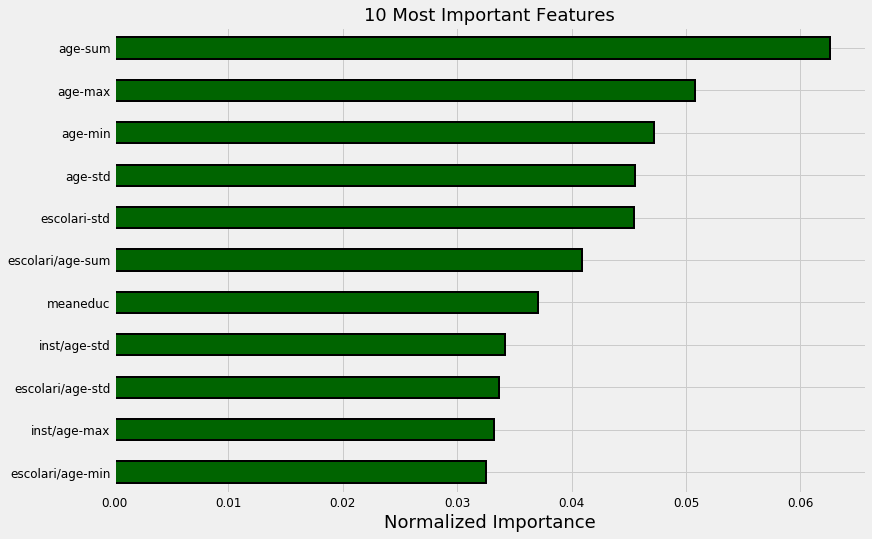

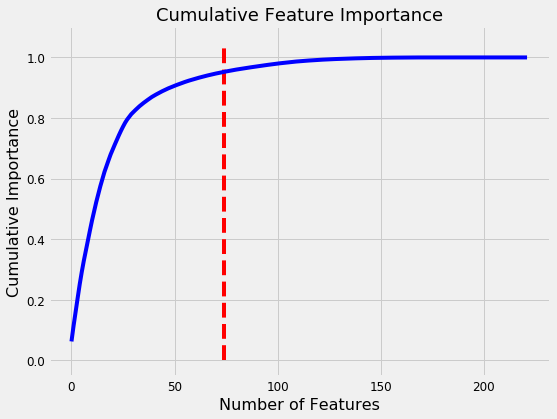

74 features required for 95% of cumulative importance


In [342]:
_ = plot_feature_importances(gbm_fi, threshold = 0.95)

<br>

#### Try Selected Features
- LightGBM의 다음 단계는 재귀적 특성 제거를 통해서 특징 선택하는 것

In [ ]:
%%capture --no-display

submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model':['GBM',  'GBM_SEL'],
                                                  'cv_mean':[valid_scores.mean(), valid_scores_selected.mean()],
                                                  'cv_std':[valid_scores.std(), valid_scores_selected.std()]}), sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8,6), yerr = list(model_results['cv_std']),
                                                                                edgecolor = 'k', linewidth = 2)

plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace = True)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, 
                                             nfolds=10, return_preds=False)

In [ ]:
# submission.to_csv('gbm_10fold.csv', index = False)

In [ ]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids,
                                                               nfolds=10)

In [ ]:
# submission.to_csv('gmb_10fold_selected.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                    sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6), 
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")

<br>

### Model Optimization

- 하이퍼 파라미터 튜닝
    - Grid Search
    - Random Search
    - Automated Optimization
    
<br>

### Model Tuning with Hyperopt
- Objective Function : what we want to maximize
- Domain space : region over which to search
- Algorithm for choosing next hyperparameters : uses past results to suggest next values
- Results history : saves the past results

참고) https://data-newbie.tistory.com/255

In [343]:
!pip install hyperopt

In [344]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

In [345]:
import csv
import ast
from timeit import default_timer as timer

<br>

#### 1. Objective Function
This takes in the model hyperparameters and returns the associated validation score. Hyperopt needs a score to minimize, so we return 1 - Macro F1 score.

In [346]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

<br>

#### 2. Search Space

In [347]:
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [348]:
sample(space)

{'boosting_type': {'boosting_type': 'dart',
  'drop_rate': 0.27092035261917724,
  'subsample': 0.792526715987228,
  'subsample_freq': 3.0},
 'colsample_bytree': 0.638607399952869,
 'learning_rate': 0.2256371675420101,
 'limit_max_depth': False,
 'max_depth': 15.0,
 'min_child_samples': 20.0,
 'num_leaves': 39.0,
 'reg_alpha': 0.8127393780196115,
 'reg_lambda': 0.5910937378046337,
 'subsample_for_bin': 66000.0}

<br>

#### 3. Algorithm

In [349]:
algo = tpe.suggest

<br>

#### 4. Results History

- Trials object : stores everythin returned from the objective function
- Write to a csf file on every iteration

In [350]:
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [ ]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

'Running Optimization for 100 Trials.'

'Iteration: 10, Current Score: 0.4317.'

'Iteration: 20, Current Score: 0.4357.'

'Iteration: 30, Current Score: 0.4192.'

'Iteration: 40, Current Score: 0.4299.'

'Iteration: 50, Current Score: 0.4201.'

'Iteration: 60, Current Score: 0.4237.'

In [ ]:
import json

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

<br>

### Using Optimized Model

In [ ]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending = True).reset_index()
results.head()

In [ ]:
plt.figure(figsize = (8, 6))
sns.regplot('iteration', 'score', data = results);
plt.title("Optimization Scores");
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)));

In [ ]:
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, 
                                             test_selected, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)


In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)

In [ ]:
model_results.head()

In [ ]:
_ = plot_feature_importances(gbm_fi)

<br>

### Investigate Predictions

In [ ]:
preds = submission_base.merge(submission, on = 'Id', how='left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
heads['Target'].sort_index().plot.bar.hist(normed = True, edgecolor = r'k',
                                          linewidth=2, ax = axes[0])

axes[0].set_xticks([1, 2, 3, 4]);
axes[0].set_xticklabels(poverty_mapping.values(), rotation = 60)
axes[0].set_title('Train Label Distribution')

# Plot the predicted labels
preds['Target'].sort_index().plot.hist(normed = True, 
                                       edgecolor = 'k',
                                       linewidth = 2,
                                       ax = axes[1])
axes[1].set_xticks([1, 2, 3, 4]);
axes[1].set_xticklabels(poverty_mapping.values(), rotation = 60)
plt.subplots_adjust()
plt.title('Predicted Label Distribution');

In [ ]:
heads['Target'].value_counts()

In [ ]:
preds['Target'].value_counts()

<br>

### Validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_selected, train_labels,
                                                     test_size = 1000, random_state = 10)

model = lgb.LGBMClassifier(**best_hyp, class_weight = 'balanced', random_state = 10)

model.fit(X_train, y_train)

In [ ]:
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

In [ ]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

In [ ]:
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

<br>

### 차원 축소

In [ ]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

In [ ]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    # TSNE has no transform method
    if name == 'tsne':
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
    
    else:
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
        
        test_reduction = method.transform(test_selected)
    
        # Add components to test data
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]

    # Add components to training data for visualization and modeling
    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]
    
    print(f'Method: {name} {round(end - start, 2)} seconds elapsed.')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)

train_df['label'] = train_labels

In [ ]:
for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2'  % name], train_df['%s_c3'  % name], 
                   c = train_df['label'].astype(int), cmap = cmap)
    
    plt.title(f'{name.capitalize()}', size = 22)
    fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])

In [ ]:
train_df, test_df = train_df.align(test_df, axis = 1, join = 'inner')

In [ ]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels, 
                                             test_df, test_ids, nfolds = 10,
                                             hyp = best_hyp)

In [ ]:
# submission.to_csv('gbm_opt_10fold_dr.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_DR"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True)

In [ ]:
odel_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (10, 8),
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
_ = plot_feature_importances(gbm_fi)

<br>

### Single DT 시각화

In [ ]:
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimators_[5]
estimator_limited

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [ ]:
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_nonlimited = model.estimators_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2)

!dot -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

In [ ]:
Image(filename = 'tree_nonlimited.png')